# Mini Project 

## About

## Contributors
- Le Qi - 
- Abigail -
- Shu Fang -

## Problem Definition
- Explore the correlation between certain mushrooms features and its edibility
- Find out which variable is best to predict whether the mushroom is edible or not
- Which model would be the best for predicting the edibility of the mushroom?
- Are we then able to accurately predict whether a mushroom is edible based of its features?

## Models Used
1. Binary Classification
2. 

## Conclusion

## What did we learn from this project?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
%matplotlib inline

### Import the Dataset
The dataset is in CSV format; hence we use the `read_csv` function with `delimiter` parameter from Pandas. Immediately after importing, we take a quick look at the data using the `head` function.

In [2]:
mushroom = pd.read_csv('mushroom.csv', delimiter= ';')
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
# Check the vital statistics of the dataset
print("Data type : ", type(mushroom))
print("Data dims : ", mushroom.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (61069, 21)


In [4]:
# Check the data types of the variables in the dataset
print(mushroom.dtypes)

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


# Cleaning the Dataset



### Properly naming the variables in each column


In [5]:
# Create a copy of the Dataset
mushroom_clean = mushroom.copy()

# Convert all the columns with datatype equal to 'object' to category
# .loc[:,mushroom_clean_dtypes == 'object'] => to locate the variables of object data types
# select_dtypes(['object']) => to select the object data types
# apply => pass a function and apply it to every selected value
# (lambda x: x.astype('category')) => assigning the astype function to x using lambda
# astype => change a pandas object to a specified dtype, in this case it is categorical
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(mushroom_clean.dtypes)



# Renaming the data for each category columns
mushroom_clean['class'] = mushroom_clean['class'].cat.rename_categories({'p':'Poisonous', 'e':'Edible'})
mushroom_clean['cap-shape'] = mushroom_clean['cap-shape'].cat.rename_categories({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'Flat', 's':'Sunken', 'p':'Spherical', 'o':'Others'})
mushroom_clean['cap-surface'] = mushroom_clean['cap-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'd':'Dry'})
mushroom_clean['cap-color'] = mushroom_clean['cap-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['does-bruise-or-bleed'] = mushroom_clean['does-bruise-or-bleed'].cat.rename_categories({'t':'Bruises or Bleeds', 'f':'Neither'})
mushroom_clean['gill-attachment'] = mushroom_clean['gill-attachment'].cat.rename_categories({'a':'Adnate', 'x':'Adnexed', 'd':'Decurrent', 'e':'Free', 's':'Sinuate', 'p':'Pores', 'f':'None'})
mushroom_clean['gill-spacing'] = mushroom_clean['gill-spacing'].cat.rename_categories({'c':'Close', 'd':'Distant', 'f':'None'})
mushroom_clean['gill-color'] = mushroom_clean['gill-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['stem-root'] = mushroom_clean['stem-root'].cat.rename_categories({'b':'Bulbous', 's':'Swollen', 'c':'Club', 'u':'Cup', 'e':'Equal', 'z':'Rhizomorphs', 'r':'Root', 'f':'None'})
mushroom_clean['stem-surface'] = mushroom_clean['stem-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'f':'None'})
mushroom_clean['stem-color'] = mushroom_clean['stem-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['veil-type'] = mushroom_clean['veil-type'].cat.rename_categories({'p':'Partial', 'u':'Universal'})
mushroom_clean['veil-color'] = mushroom_clean['veil-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['has-ring'] = mushroom_clean['has-ring'].cat.rename_categories({'t':'Yes', 'f':'No'})
mushroom_clean['ring-type'] = mushroom_clean['ring-type'].cat.rename_categories({'c':'Cobwebby', 'e':'Evanescent', 'r':'Flaring', 'g':'Grooved', 'l':'Large', 'p':'Pendant', 's':'Sheathing', 'z':'Zone', 'y':'Scaly', 'm':'Movable', 'f':'None'})
mushroom_clean['spore-print-color'] = mushroom_clean['spore-print-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['habitat'] = mushroom_clean['habitat'].cat.rename_categories({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths', 'h':'Heaths', 'u':'Urban', 'w':'Waste', 'd':'Woods'})
mushroom_clean['season'] = mushroom_clean['season'].cat.rename_categories({'s':'Spring', 'u':'Summer', 'a':'Autumn', 'w':'Winter'})

#Rename the 3 numerical columns to include the units of measurements
mushroom_clean.rename(columns = {'cap-diameter':'cap-diameter(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-height':'stem-height(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-width':'stem-width(mm)'}, inplace = True)

mushroom_clean

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object


,class,cap-diameter(cm),cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height(cm),...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,Poisonous,15.26,Convex,Grooves,Orange,Neither,Free,NaN,White,16.95,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Winter
1,Poisonous,16.60,Convex,Grooves,Orange,Neither,Free,NaN,White,17.99,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Summer
2,Poisonous,14.07,Convex,Grooves,Orange,Neither,Free,NaN,White,17.80,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Winter
3,Poisonous,14.17,Flat,Shiny,Red,Neither,Free,NaN,White,15.77,...,Swollen,Scaly,White,Universal,White,Yes,Pendant,NaN,Woods,Winter
4,Poisonous,14.64,Convex,Shiny,Orange,Neither,Free,NaN,White,16.53,...,Swollen,Scaly,White,Universal,White,Yes,Pendant,NaN,Woods,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,Poisonous,1.18,Sunken,Smooth,Yellow,Neither,None,None,None,3.93,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Autumn
61065,Poisonous,1.27,Flat,Smooth,Yellow,Neither,None,None,None,3.18,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Autumn
61066,Poisonous,1.27,Sunken,Smooth,Yellow,Neither,None,None,None,3.86,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Summer
61067,Poisonous,1.24,Flat,Smooth,Yellow,Neither,None,None,None,3.56,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Summer


### Dealing with NaN values

In [6]:
#Checking number of null data per column

print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())

(61069, 21)
class                       0
cap-diameter(cm)            0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height(cm)             0
stem-width(mm)              0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


<Figure size 1600x800 with 0 Axes>

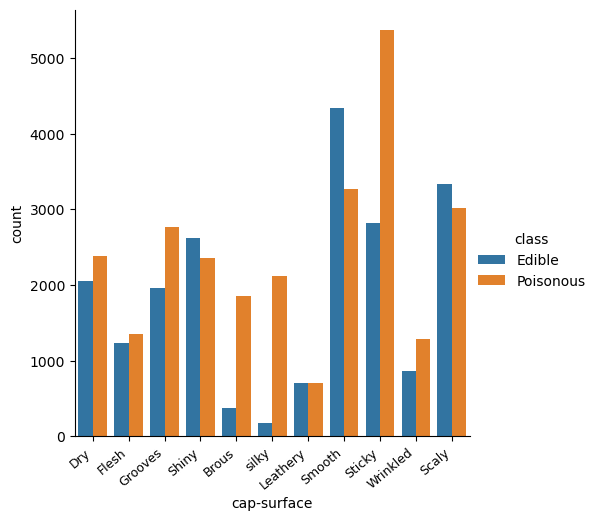

<Figure size 1600x800 with 0 Axes>

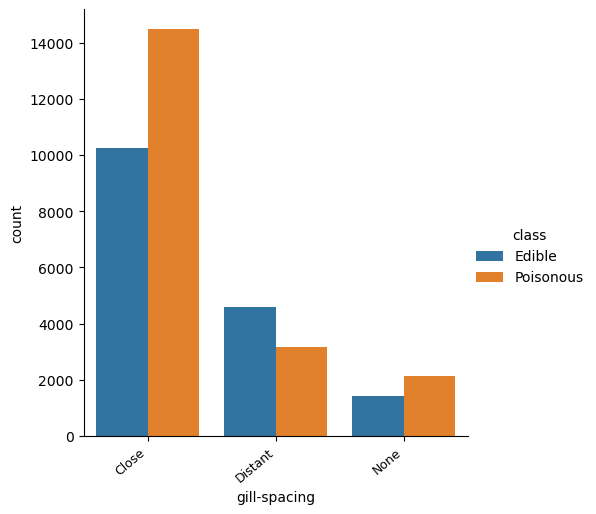

<Figure size 1600x800 with 0 Axes>

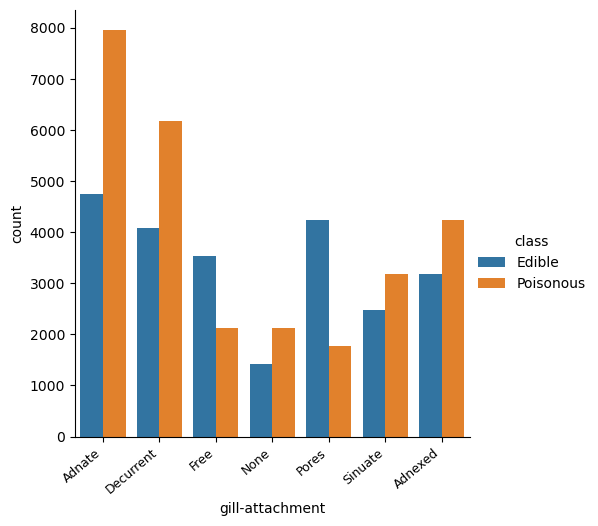

<Figure size 1600x800 with 0 Axes>

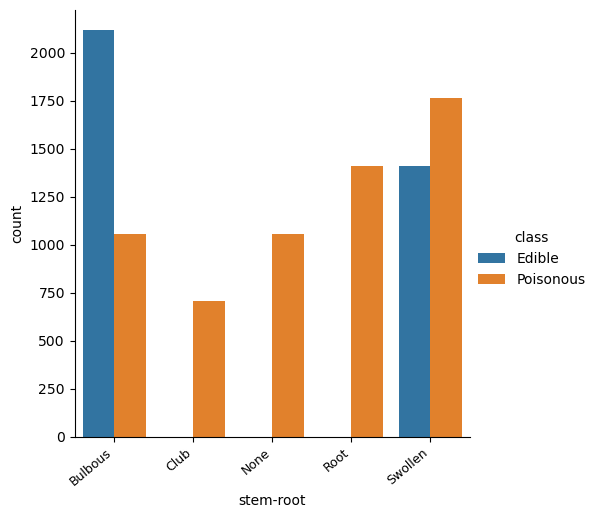

<Figure size 1600x800 with 0 Axes>

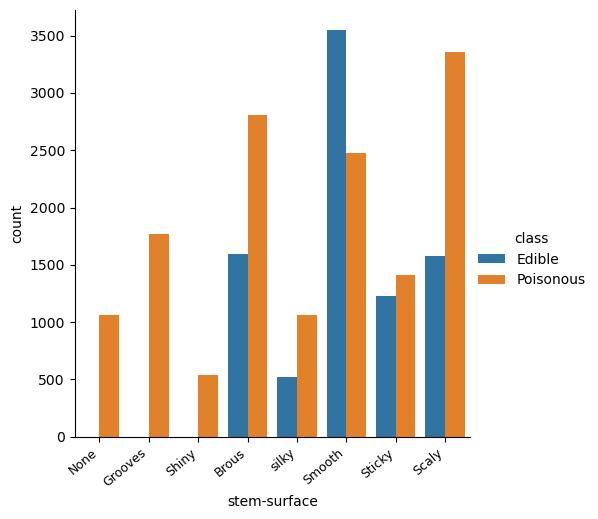

<Figure size 1600x800 with 0 Axes>

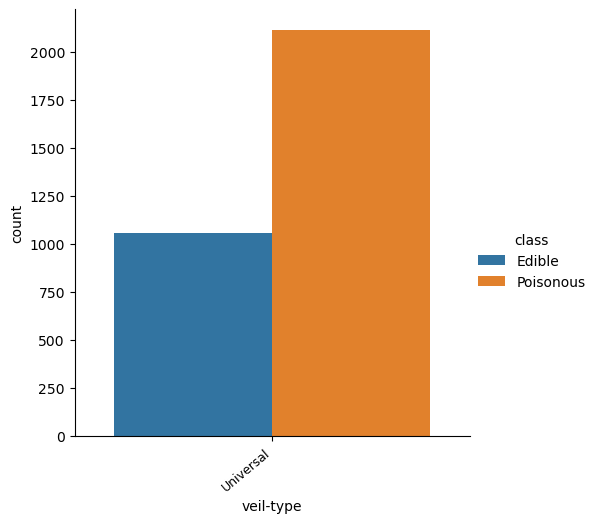

<Figure size 1600x800 with 0 Axes>

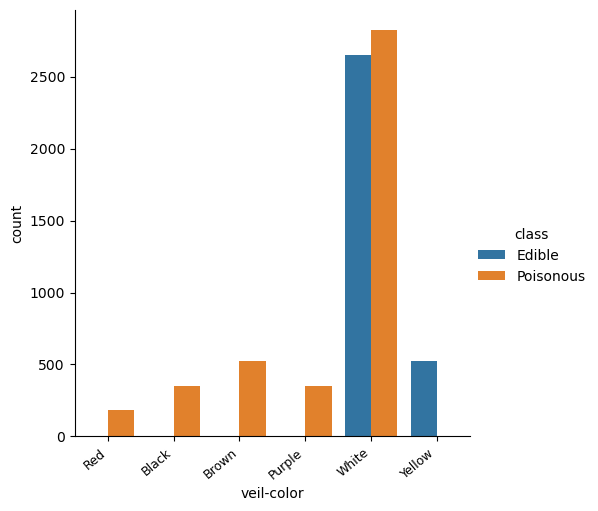

<Figure size 1600x800 with 0 Axes>

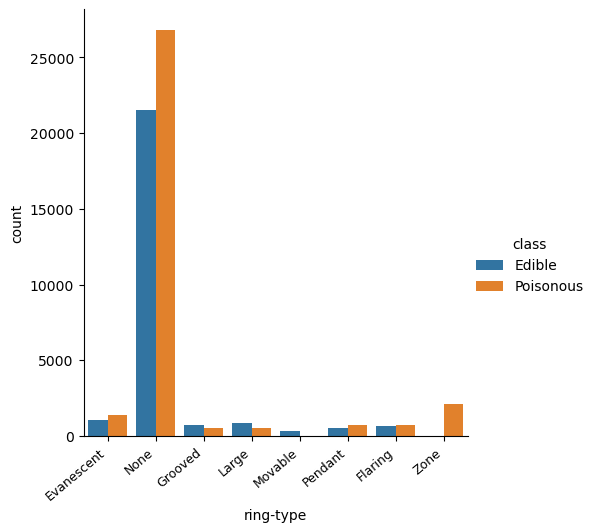

<Figure size 1600x800 with 0 Axes>

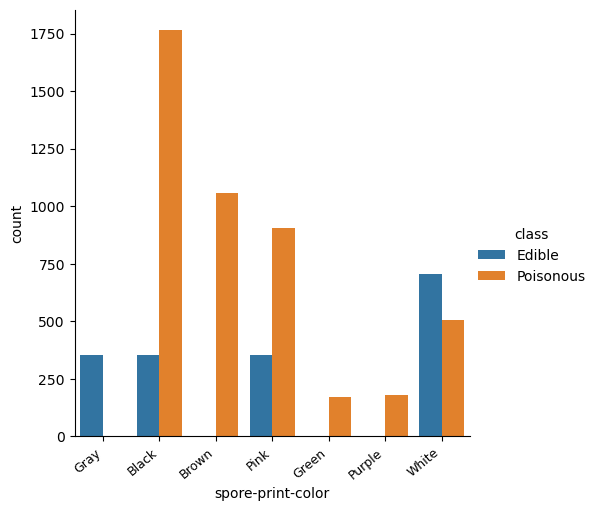

In [7]:
#Some columns feature large amounts of its rows as missing data.
#They are 9 categorical variables that have NULL values:
#cap-surface,gill-spacing,gill-attachment,stem-root,stem-surface,veil-type,veil-color,ring-type,spore-print-color

category_with_NULL=pd.DataFrame(mushroom_clean[['cap-surface', 'gill-spacing', 'gill-attachment', 'stem-root','stem-surface','veil-type','veil-color','ring-type','spore-print-color']])

for column in category_with_NULL:
    f = plt.figure(figsize=(16, 8))
    ax=sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean)
    ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
    

### Our thought process on how to deal with NaN values

It would not be practical to remove all rows with NaN values as over 50,000 of our 61,069 values would be removed.

Next, filling in the missing values with the mode of categorical variable would not be practical, as it could cause a bias in the data, and would possibly affect the classification of these mushrooms. Many of them could be classified as edible due to the filled in data, when they could be infact poisonous. (and Vice-versa) This would not be ideal.

Lastly, we decided to do abit of Data Exploratory first to have a brief idea on the correlation between these variables and edibility. We would then remove the columns of variables that will not be helpful in classifying a mushrooms edibility.


### Result:

By observation of the grouped Bar plots, we are removing

####1. **Gill Spacing**: As it does not have a very high confidence level in classifying edibility across all the different Gill Spacings.

2. **Universal Veil Type**: As it only contains one categorical level, and does not help in our investigation at all

####3. **Ring Type**: As it does not have a very high confidence level in classifying edibility across the different ring types. There are only 2 ring types out of the 8 types with high confidence levels however they are <1000 in count.


We will leave the rest of columns with NaN values as they are, as we believe they will be useful in classfication due to their relatively higher confidence levels across their different features.

In [8]:
#Remove these 3 categories from dataset.

mushroom_clean.drop(['veil-type'], axis=1,inplace=True)
print("Data dims : ", mushroom_clean.shape)

Data dims :  (61069, 20)


In [9]:
#Add category "Unknown" for the remaining columns with NaN values
   
        
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
        
## Call function to create new category for variables
for column in mushroom_clean:
    if (np.NaN in mushroom_clean[column].unique()):
        impute_nan_create_category(mushroom_clean,column)

#Change object back into category
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))


print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())
mushroom_clean.info()

    

(61069, 20)
class                   0
cap-diameter(cm)        0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height(cm)         0
stem-width(mm)          0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter(cm)      61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           61069 non-null  category
 4   cap-color             61069 n

# Data Exploration and Visualisation

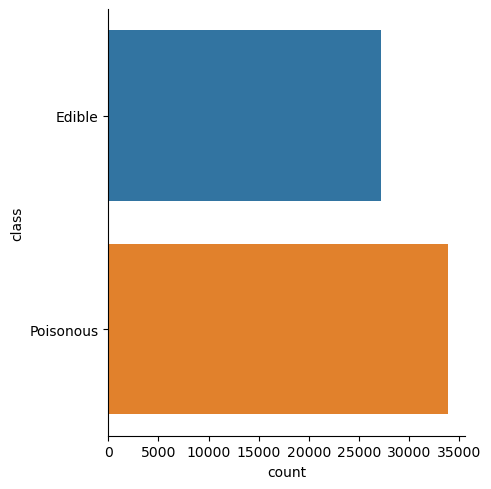

In [10]:
#Looking at the count of edible vs poisonous mushrooms in our data 
sb.catplot(y = "class", data = mushroom_clean, kind = "count")

We can see that we have a roughly equal amount of edible vs poisonous mushrooms in our data 

### Exploring the 3 numerical data columns
Numerical variables:
1. cap-diameter
2. stem-height
3. stem-width

<AxesSubplot:xlabel='stem-width(mm)'>

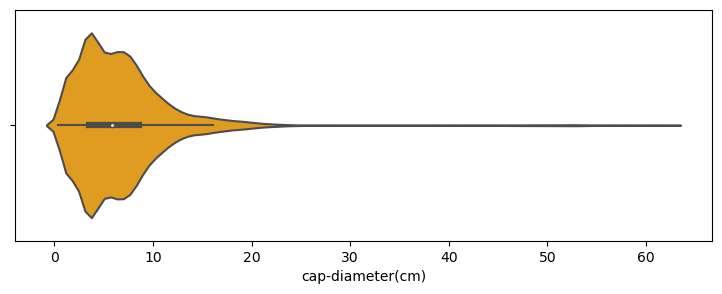

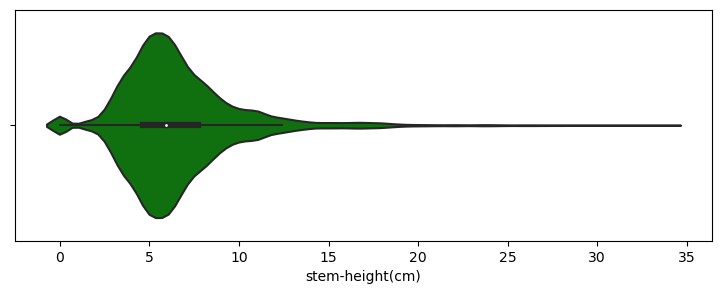

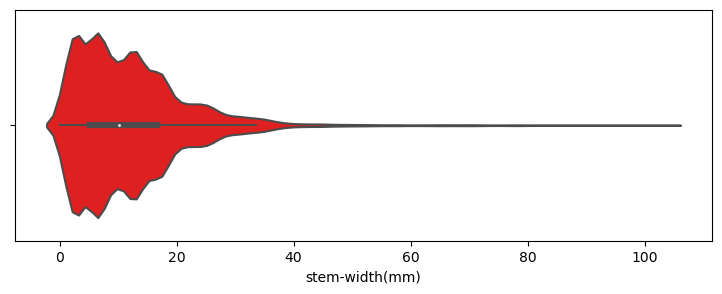

In [11]:
f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x = 'cap-diameter(cm)',color='orange')
#sb.stripplot(data=mushroom_clean,x='cap-diameter', color='grey',alpha=0.1)

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-height(cm)',color='green')

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-width(mm)',color='red')

#### Findings:

We can see that across all 3 numerical columns, the data is mostly populated together, with a few that are significantly longer/larger across the 3 numerical columns.

### Comparing the 3 numerical variables against Class of mushroom

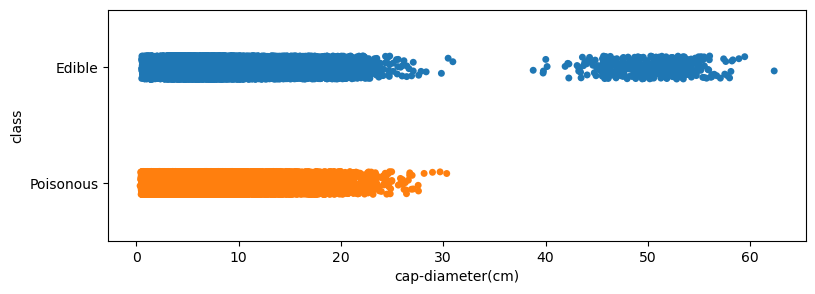

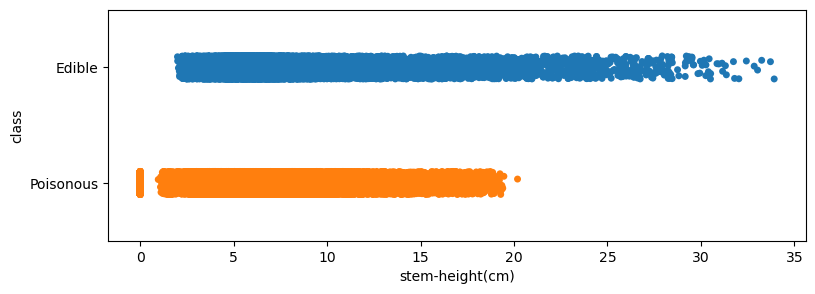

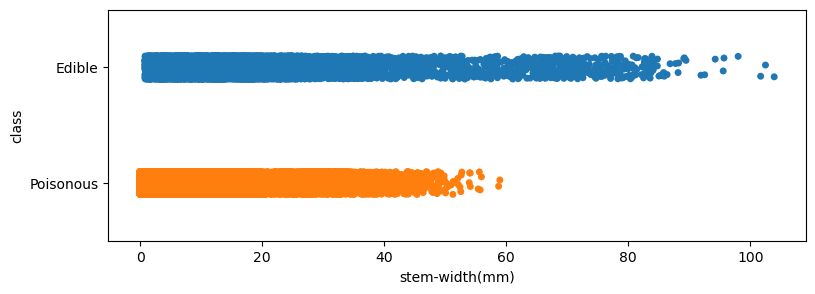

In [12]:
for column in mushroom_clean:
    if (mushroom_clean[column].dtypes == 'float64'):
        f = plt.figure(figsize=(9, 3))
        sb.stripplot(x=column, y='class', data=mushroom_clean)


#### Findings: 

We can see that for 
1. **cap-diameter** : Any mushrooms from this dataset with cap-diameter longer than 31cm is guaranteed to be edible, 100% confidence.
2. **stem-height**  : Any mushrooms from this dataset with stem-height longer than 21cm is guaranteed to be edible, 100% confidence.
3. **stem-width**   :  Any mushrooms from this dataset with stem-width longer than 60mm is guaranteed to be edible, 100% confidence.


### Exploring the 14 categorical data columns (excludes class)
Categorical variables:

1. cap-shape
2. cap-surface
3. cap-color
4. does-bruise-or-bleed
5. gill-attachment
6. gill-color
7. stem-root
8. stem-surface
9. stem-color
10. veil-color
11. has-ring
12. spore-print-color
13. habitat
14. season

C:\Users\pc\AppData\Local\Temp\ipykernel_30600\4174996883.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(9, 4))


<Figure size 900x400 with 0 Axes>

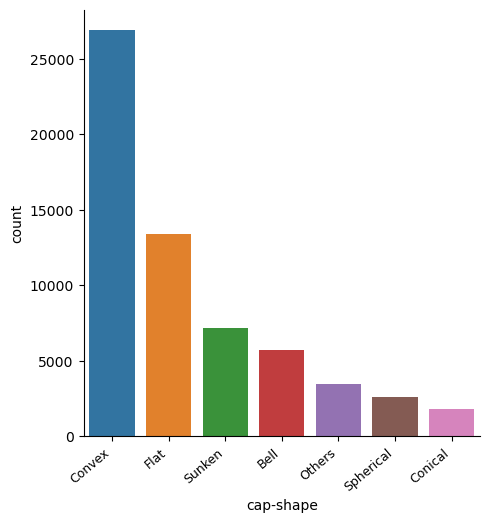

<Figure size 900x400 with 0 Axes>

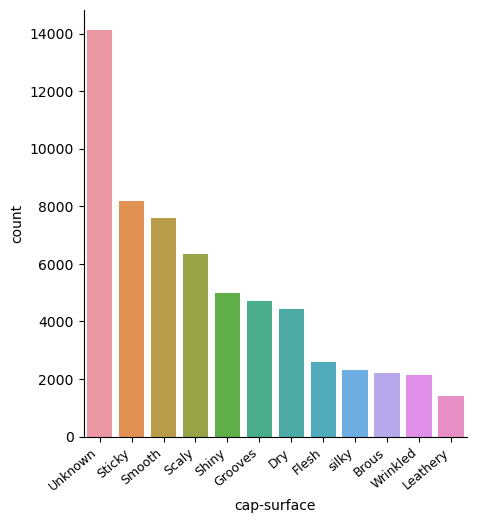

<Figure size 900x400 with 0 Axes>

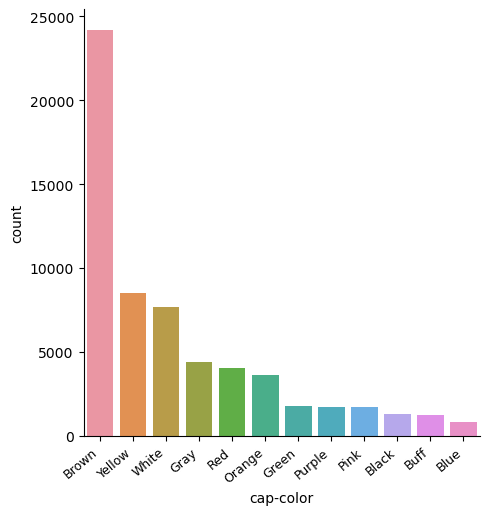

<Figure size 900x400 with 0 Axes>

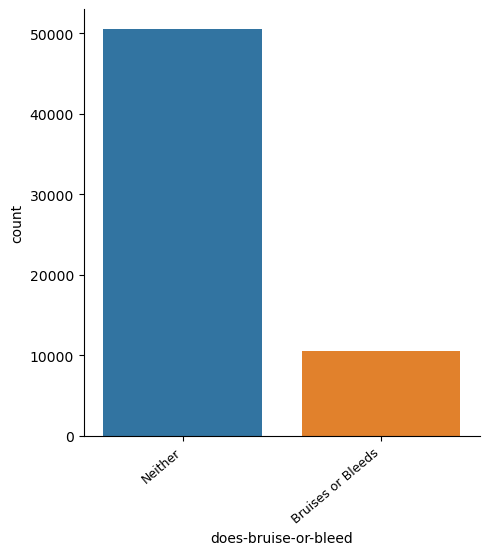

<Figure size 900x400 with 0 Axes>

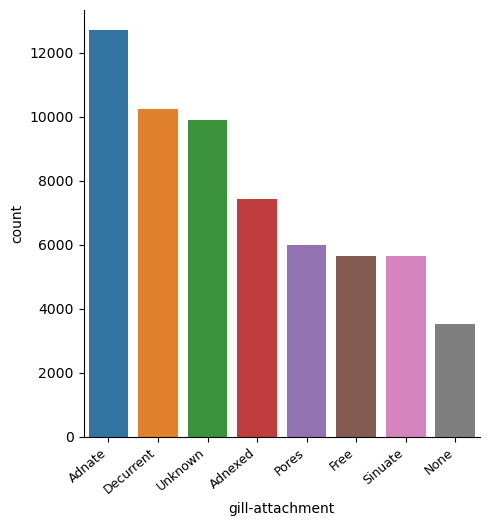

<Figure size 900x400 with 0 Axes>

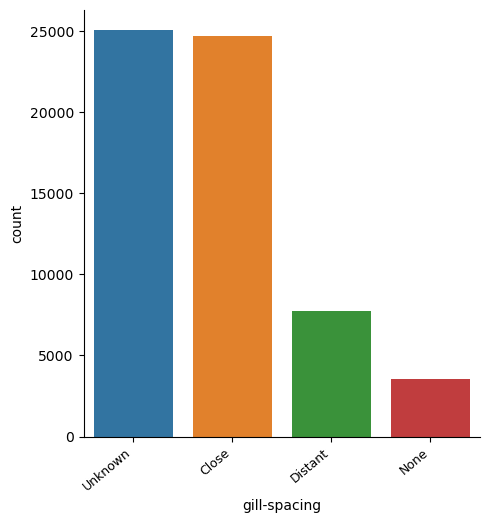

<Figure size 900x400 with 0 Axes>

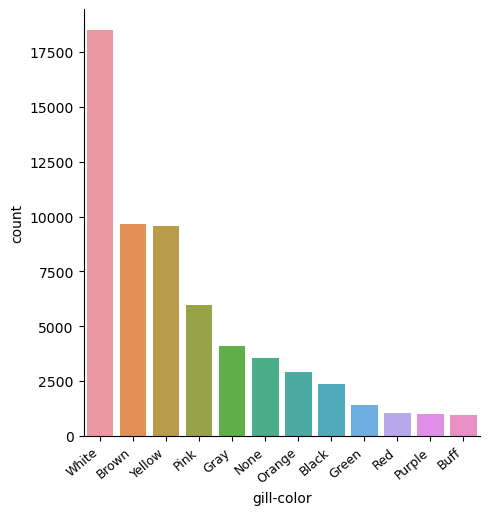

<Figure size 900x400 with 0 Axes>

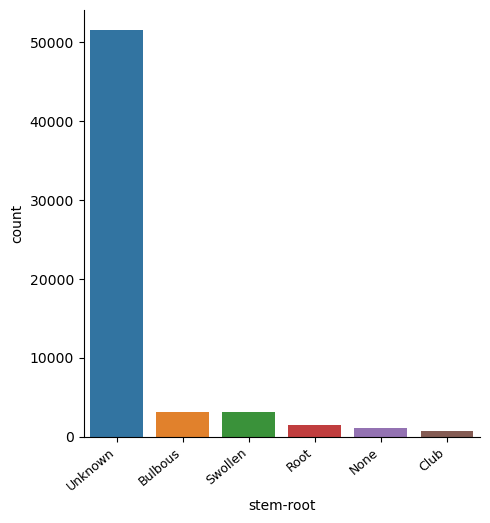

<Figure size 900x400 with 0 Axes>

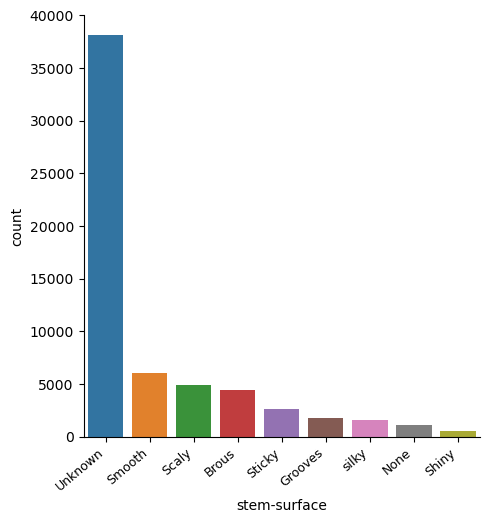

<Figure size 900x400 with 0 Axes>

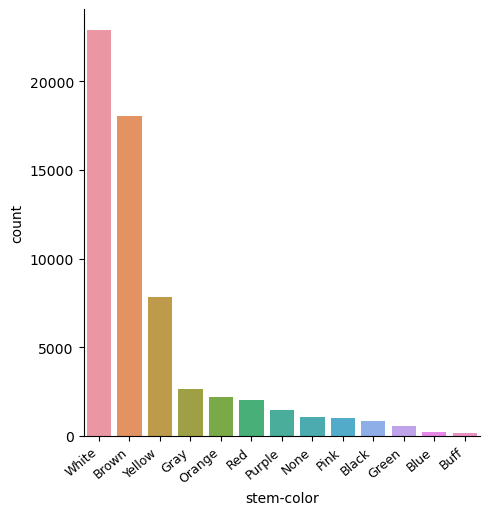

<Figure size 900x400 with 0 Axes>

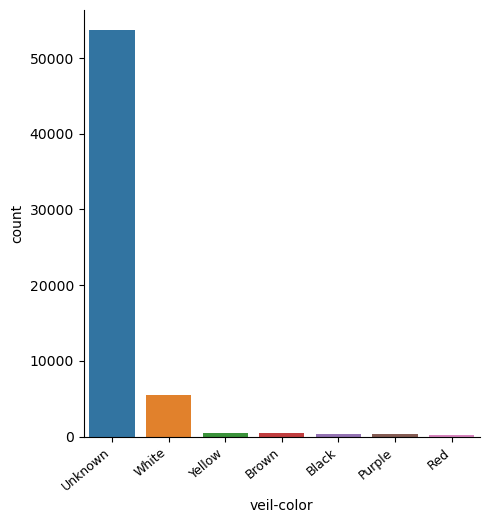

<Figure size 900x400 with 0 Axes>

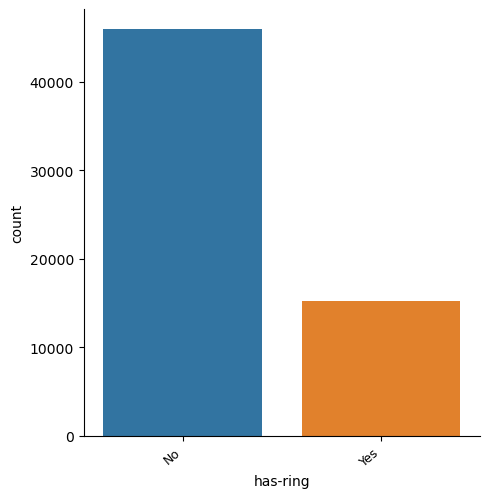

<Figure size 900x400 with 0 Axes>

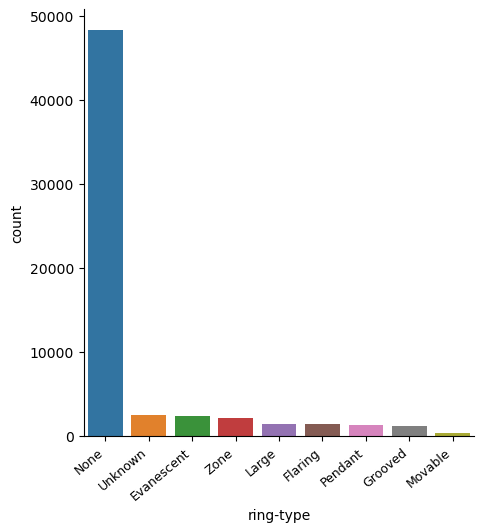

<Figure size 900x400 with 0 Axes>

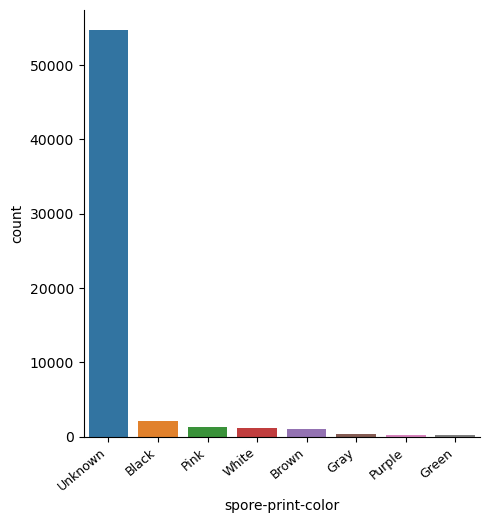

<Figure size 900x400 with 0 Axes>

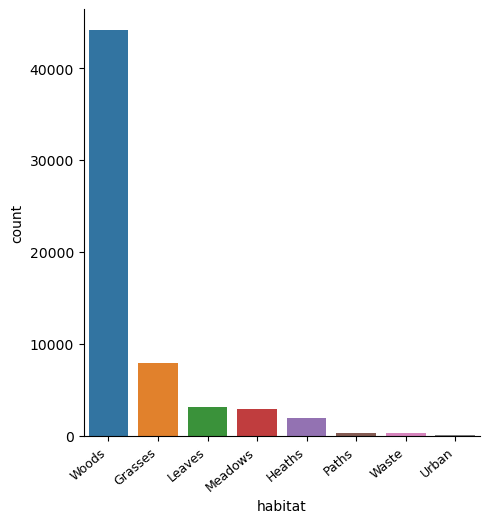

<Figure size 900x400 with 0 Axes>

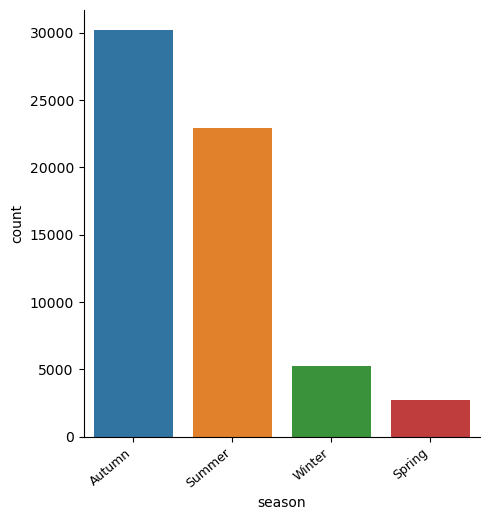

In [13]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, data = mushroom_clean, kind = "count",order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 


#### Findings: 

We can see that most of the categorical columns are unbalanced between their features, there are some features that are common and some are very rare.

These can be seen from the colours of the different features, where colours like Brown,Yellow,White are much more common than colours such as Orange,Red,Purple,Pink,Black,Green,Blue,Gray.

2 more obseved significant unbalances are that most of the mushrooms in this dataset do not Bruise or Bleed 
and that most mushrooms are from the habitat "Woods".

### Comparing the 14 Categorical variables against Class of mushroom


<Figure size 900x400 with 0 Axes>

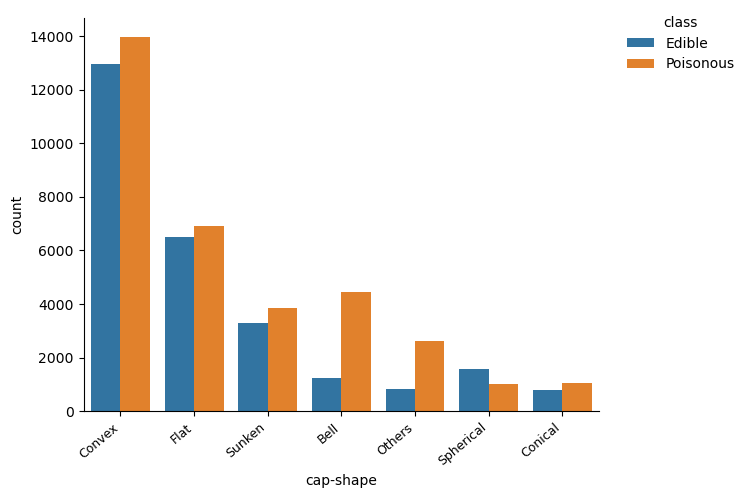

<Figure size 900x400 with 0 Axes>

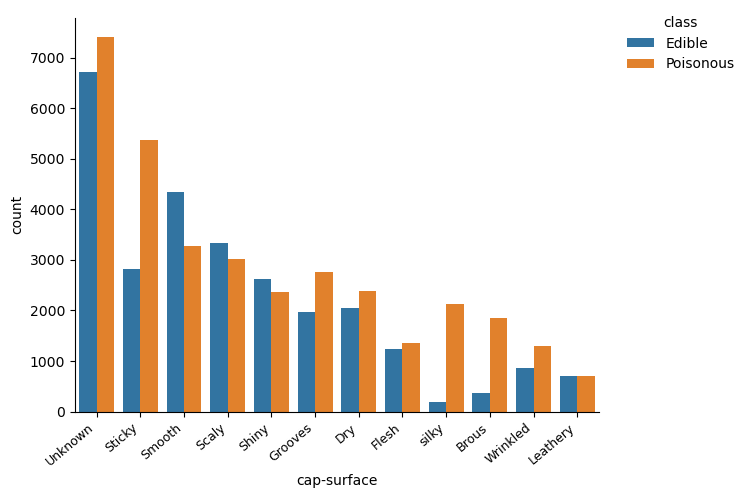

<Figure size 900x400 with 0 Axes>

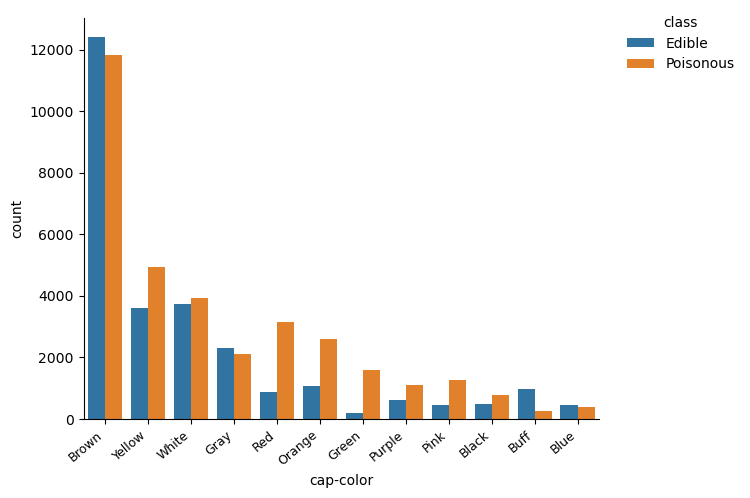

<Figure size 900x400 with 0 Axes>

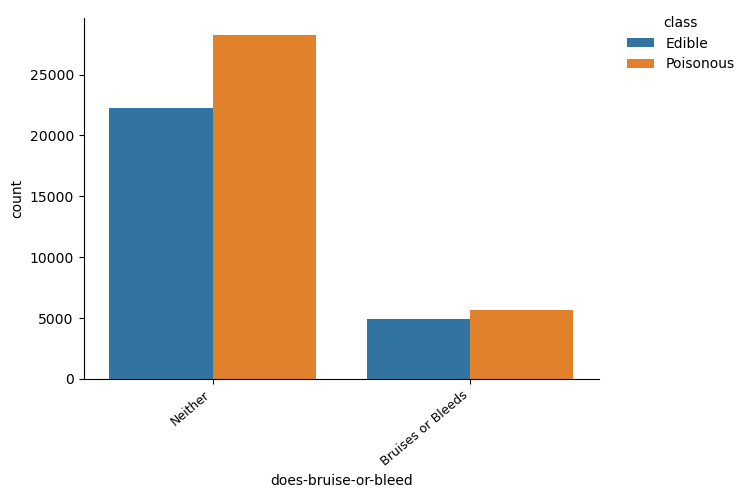

<Figure size 900x400 with 0 Axes>

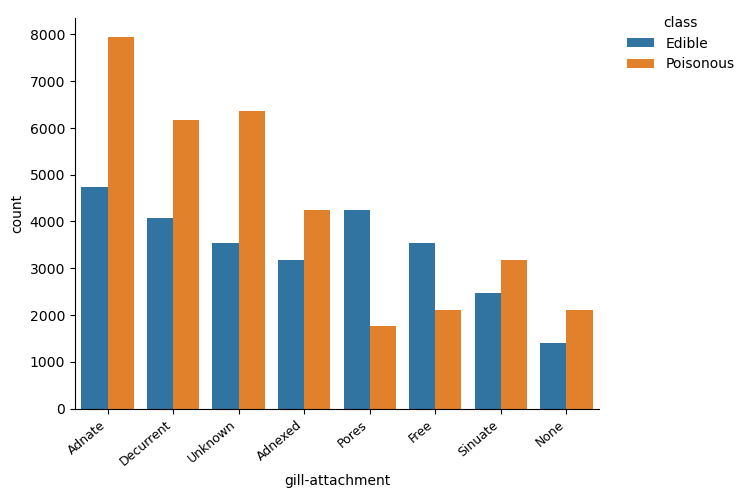

<Figure size 900x400 with 0 Axes>

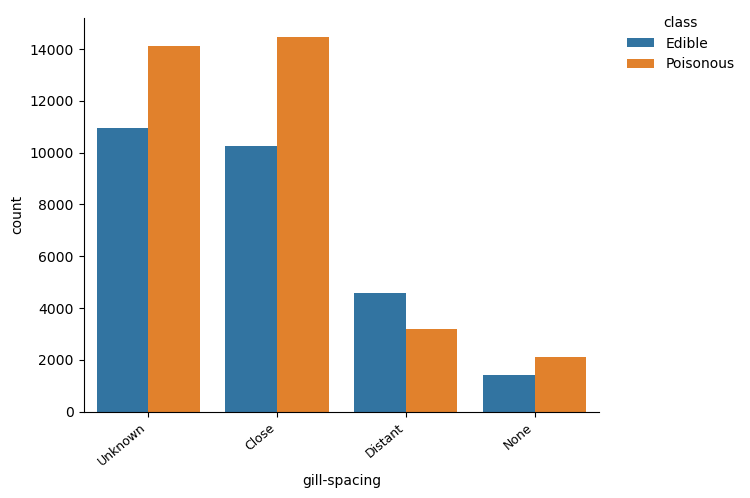

<Figure size 900x400 with 0 Axes>

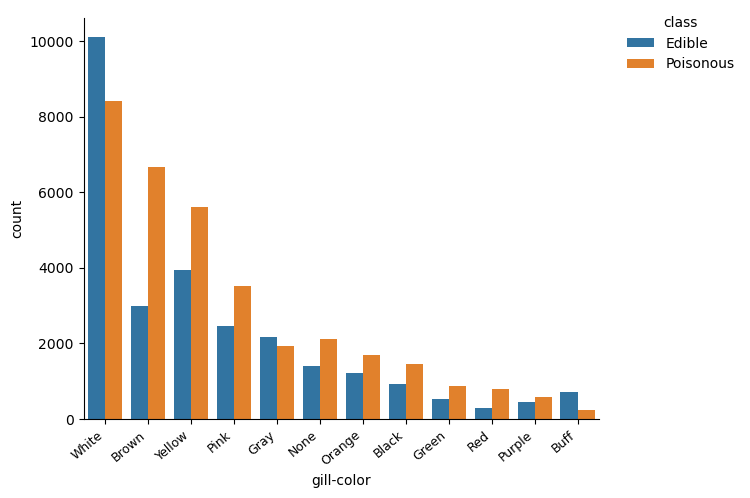

<Figure size 900x400 with 0 Axes>

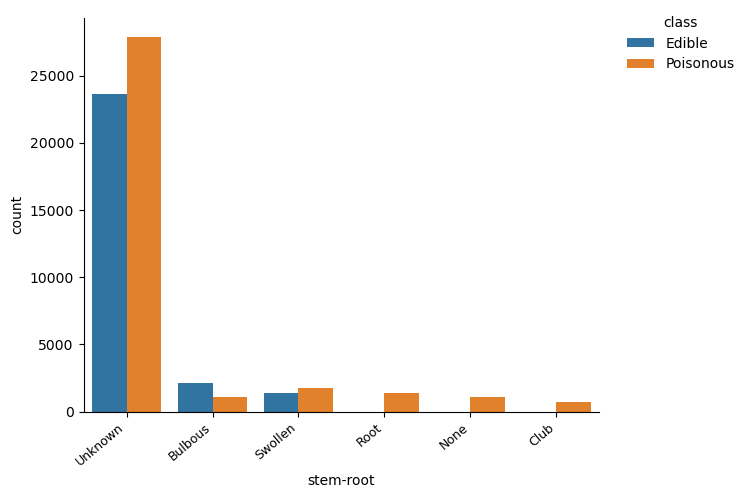

<Figure size 900x400 with 0 Axes>

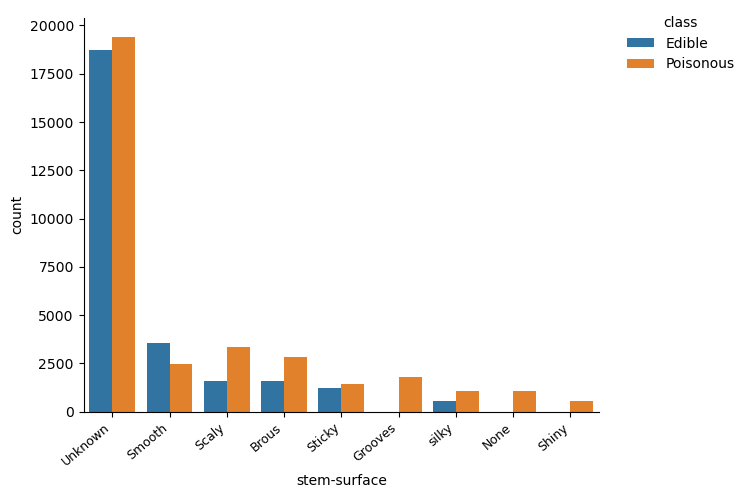

<Figure size 900x400 with 0 Axes>

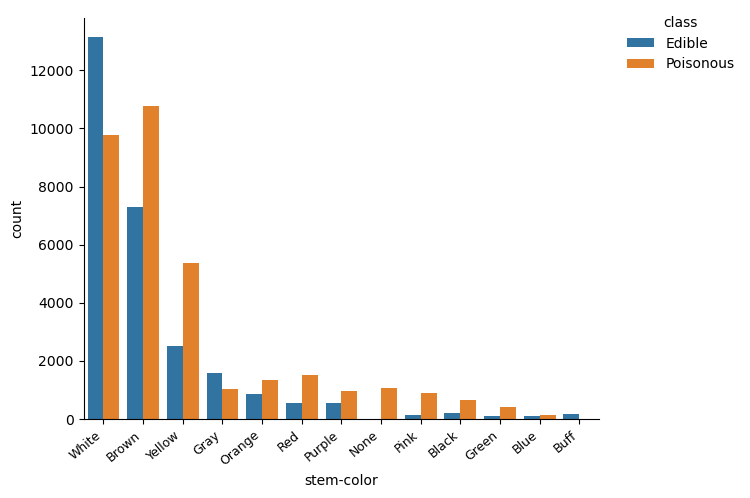

<Figure size 900x400 with 0 Axes>

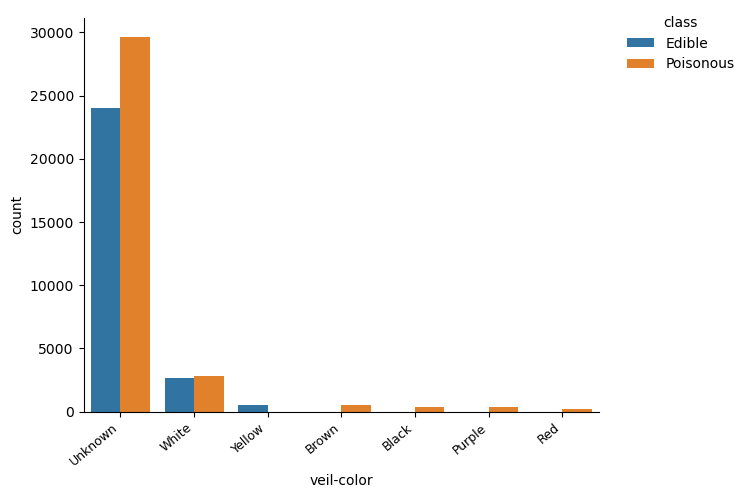

<Figure size 900x400 with 0 Axes>

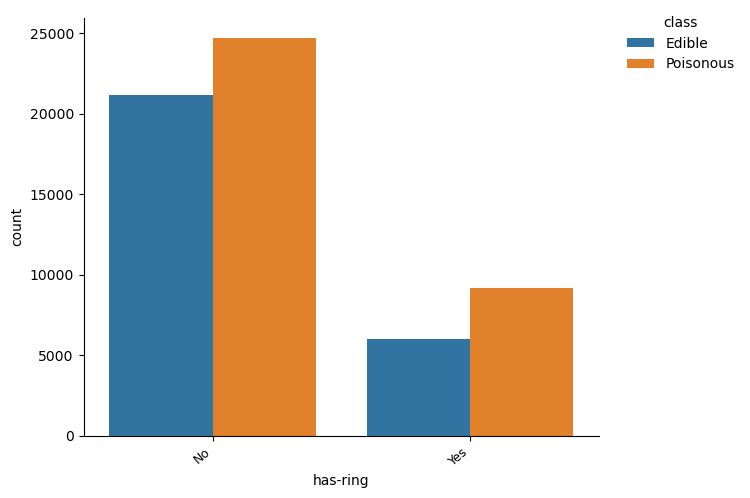

<Figure size 900x400 with 0 Axes>

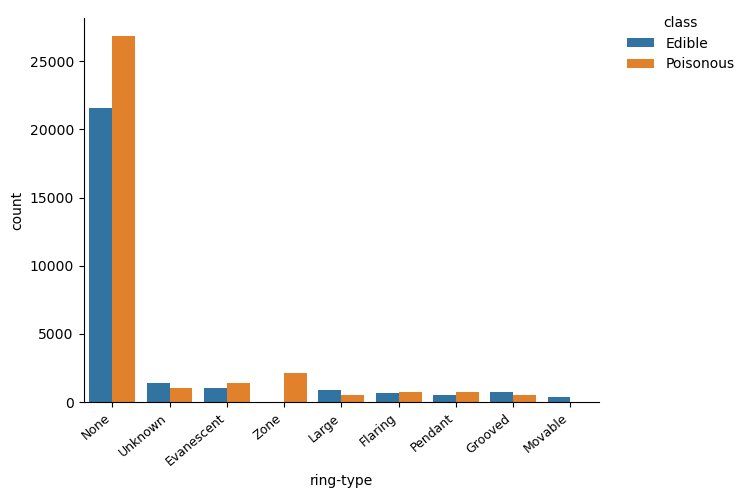

<Figure size 900x400 with 0 Axes>

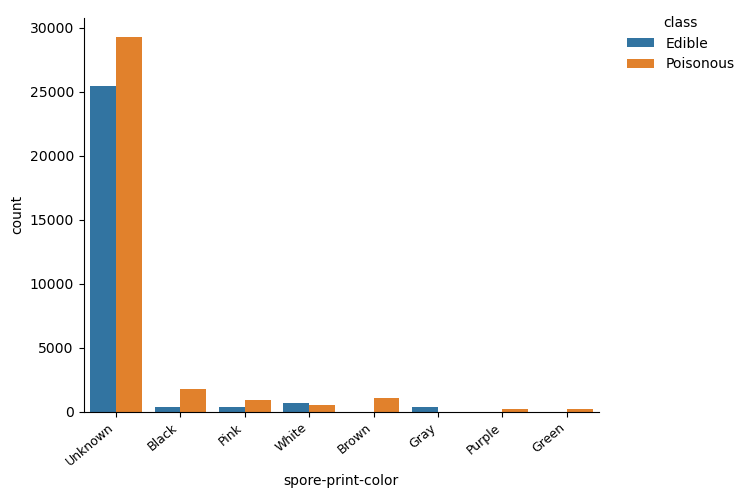

<Figure size 900x400 with 0 Axes>

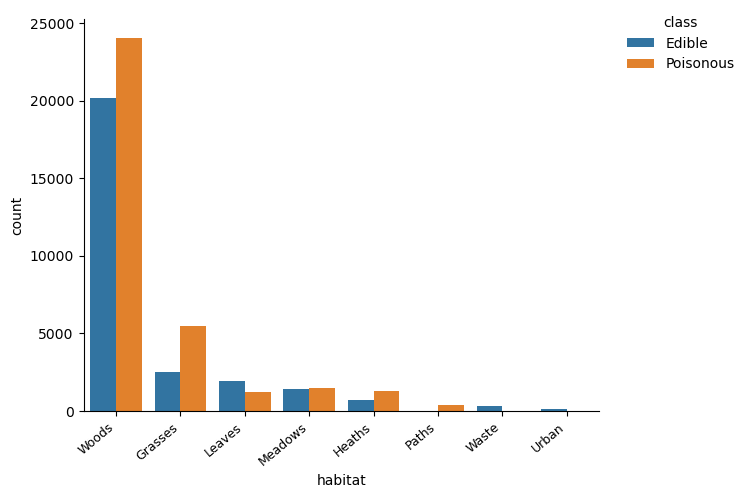

<Figure size 900x400 with 0 Axes>

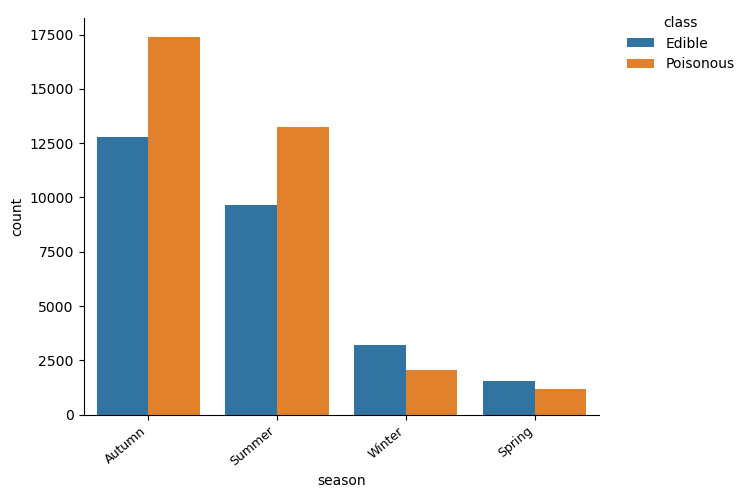

In [14]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean,order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
        #Tilted the labels so they dont overlap
        #Arranged categories in descending order based on count
        sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Got the legend out of da way
        plt.tight_layout()
        plt.show()

#### Findings: 

Hii

In [15]:
#Create new data set with the categorical columns

mushroom_cat = mushroom_clean.copy()

for column in mushroom_cat: 
    if (mushroom_cat[column].dtypes == 'float64'):
        mushroom_cat.drop(column, axis=1,inplace=True)
        
mushroom_cat

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,Poisonous,Convex,Grooves,Orange,Neither,Free,Unknown,White,Swollen,Scaly,White,White,Yes,Grooved,Unknown,Woods,Winter
1,Poisonous,Convex,Grooves,Orange,Neither,Free,Unknown,White,Swollen,Scaly,White,White,Yes,Grooved,Unknown,Woods,Summer
2,Poisonous,Convex,Grooves,Orange,Neither,Free,Unknown,White,Swollen,Scaly,White,White,Yes,Grooved,Unknown,Woods,Winter
3,Poisonous,Flat,Shiny,Red,Neither,Free,Unknown,White,Swollen,Scaly,White,White,Yes,Pendant,Unknown,Woods,Winter
4,Poisonous,Convex,Shiny,Orange,Neither,Free,Unknown,White,Swollen,Scaly,White,White,Yes,Pendant,Unknown,Woods,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,Poisonous,Sunken,Smooth,Yellow,Neither,None,None,None,Unknown,Unknown,Yellow,Unknown,No,None,Unknown,Woods,Autumn
61065,Poisonous,Flat,Smooth,Yellow,Neither,None,None,None,Unknown,Unknown,Yellow,Unknown,No,None,Unknown,Woods,Autumn
61066,Poisonous,Sunken,Smooth,Yellow,Neither,None,None,None,Unknown,Unknown,Yellow,Unknown,No,None,Unknown,Woods,Summer
61067,Poisonous,Flat,Smooth,Yellow,Neither,None,None,None,Unknown,Unknown,Yellow,Unknown,No,None,Unknown,Woods,Summer


In [16]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 


for feature in mushroom_cat.columns :
    data_encoded[feature]=label.fit_transform(mushroom_cat[feature])


data_encoded

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,2,3,6,1,3,3,10,4,3,11,5,1,2,6,7,3
1,1,2,3,6,1,3,3,10,4,3,11,5,1,2,6,7,2
2,1,2,3,6,1,3,3,10,4,3,11,5,1,2,6,7,3
3,1,3,6,9,1,3,3,10,4,3,11,5,1,6,6,7,3
4,1,2,6,6,1,3,3,10,4,3,11,5,1,6,6,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,6,7,11,1,4,2,5,5,7,12,4,0,5,6,7,0
61065,1,3,7,11,1,4,2,5,5,7,12,4,0,5,6,7,0
61066,1,6,7,11,1,4,2,5,5,7,12,4,0,5,6,7,2
61067,1,3,7,11,1,4,2,5,5,7,12,4,0,5,6,7,2


In [17]:
# Building of Cramer's V function

from scipy.stats import chi2_contingency
import numpy as np


def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))
        
    
#Building of the matrix
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
class,1.00,0.04,0.05,0.06,0.00,0.05,0.01,0.04,0.05,0.07,0.07,0.03,0.00,0.04,0.04,0.03,0.01
cap-shape,0.04,1.00,0.05,0.02,0.11,0.14,0.14,0.10,0.08,0.10,0.07,0.01,0.05,0.04,0.02,0.03,0.02
cap-surface,0.05,0.05,1.00,0.03,0.06,0.08,0.09,0.05,0.05,0.07,0.04,0.05,0.11,0.05,0.07,0.03,0.01
cap-color,0.06,0.02,0.03,1.00,0.03,0.04,0.04,0.07,0.02,0.03,0.10,0.02,0.03,0.02,0.04,0.03,0.01
does-bruise-or-bleed,0.00,0.11,0.06,0.03,1.00,0.19,0.03,0.05,0.02,0.07,0.04,0.03,0.00,0.04,0.02,0.02,0.02
gill-attachment,0.05,0.14,0.08,0.04,0.19,1.00,0.41,0.20,0.07,0.09,0.07,0.05,0.18,0.07,0.04,0.03,0.02
gill-spacing,0.01,0.14,0.09,0.04,0.03,0.41,1.00,0.35,0.06,0.14,0.07,0.02,0.02,0.03,0.06,0.03,0.02
gill-color,0.04,0.10,0.05,0.07,0.05,0.20,0.35,1.00,0.06,0.07,0.09,0.04,0.05,0.03,0.08,0.02,0.02
stem-root,0.05,0.08,0.05,0.02,0.02,0.07,0.06,0.06,1.00,0.23,0.22,0.05,0.03,0.07,0.05,0.01,0.01
stem-surface,0.07,0.10,0.07,0.03,0.07,0.09,0.14,0.07,0.23,1.00,0.18,0.02,0.07,0.03,0.03,0.03,0.01


C:\Users\pc\AppData\Local\Temp\ipykernel_30600\1491490785.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


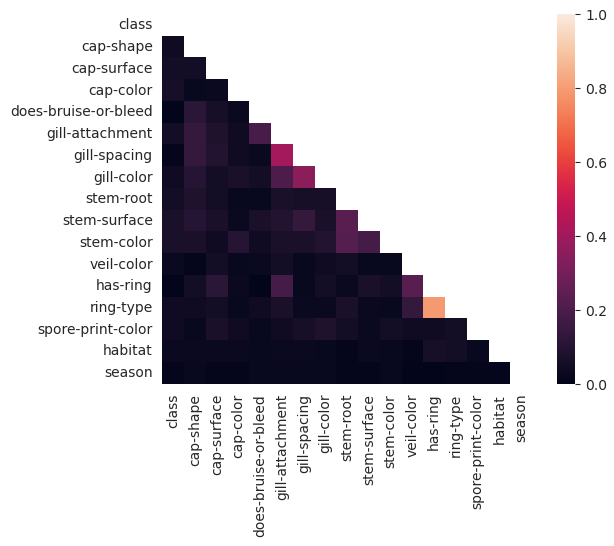

In [18]:
#Heatmap of Cramer's V correlation matrix

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sb.axes_style("white"):
  ax = sb.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

## Model 1 : Logistic Regression
Response Variable : class

Predictor Variable : all the categorical variables

In [56]:
#Creating the predictor data frame which includes :  Numerical Predictors and Cramer V of Categorical Predictors
mushroom_wo_class = mushroom_clean.copy()
mushroom_wo_class.drop(['class'], axis=1,inplace=True)


for feature in mushroom_wo_class.columns :
    mushroom_predictors[feature]=label.fit_transform(mushroom_wo_class[feature])


mushroom_predictors.drop(['class'], axis=1,inplace=True)
mushroom_predictors

,cap-diameter(cm),cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height(cm),stem-width(mm),stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1481,2,3,6,1,3,3,10,1577,1656,4,3,11,5,1,2,6,7,3
1,1614,2,3,6,1,3,3,10,1681,1766,4,3,11,5,1,2,6,7,2
2,1362,2,3,6,1,3,3,10,1662,1721,4,3,11,5,1,2,6,7,3
3,1372,3,6,9,1,3,3,10,1463,1545,4,3,11,5,1,6,6,7,3
4,1419,2,6,6,1,3,3,10,1537,1667,4,3,11,5,1,6,6,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,73,6,7,11,1,4,2,5,283,569,5,7,12,4,0,5,6,7,0
61065,82,3,7,11,1,4,2,5,208,490,5,7,12,4,0,5,6,7,0
61066,82,6,7,11,1,4,2,5,276,584,5,7,12,4,0,5,6,7,2
61067,79,3,7,11,1,4,2,5,246,491,5,7,12,4,0,5,6,7,2


In [19]:
# Create a dataset with the encoded data
catMushroom = data_encoded.copy()

In [20]:
# Extract the variables and the associated data as a dataframe
predictor = catMushroom.drop(['class'], axis = 1) ## change to mushroom_predictors
edible = pd.DataFrame(mushroom_clean['class'])

In [21]:
# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

Train Set : (48855, 1) (48855, 16)
Test Set  : (12214, 1) (12214, 16)


In [22]:
# Create the Logistic Regression object with the maximum iteration of 61069 which is the total number of rows
logreg = LogisticRegression(max_iter = 61069)


# Fit the Logistic Regression model using the train dataset
logreg.fit(predictor_train, edible_train)

# Coefficients of the Logistic Regression
print('Intercept \t: ', logreg.intercept_)
print('Coefficients \t:', logreg.coef_)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept 	:  [7.4317942]
Coefficients 	: [[-0.07952015  0.03719412  0.10490827 -0.10421463 -0.04411731  0.04369936
  -0.02751503 -0.08525625 -0.14526207 -0.03311391 -1.11605697  0.67148294
   0.12805842 -0.32938711 -0.03213438 -0.12110814]]


### The Train Set

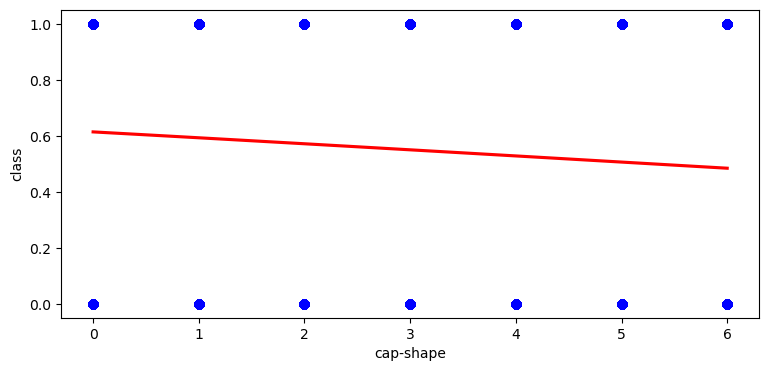

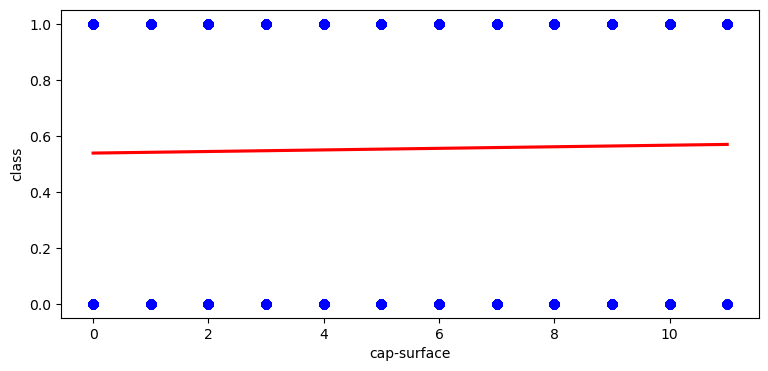

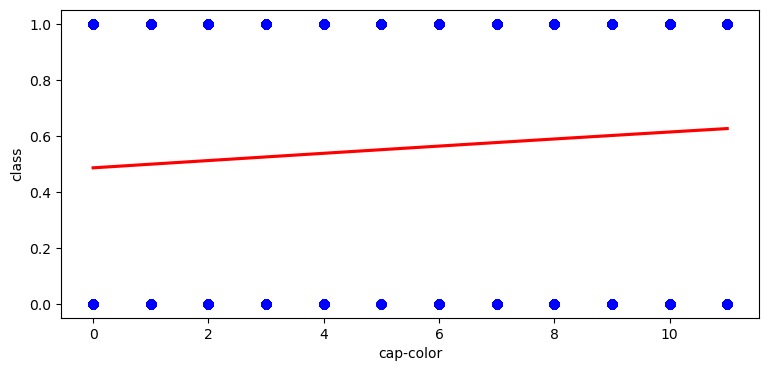

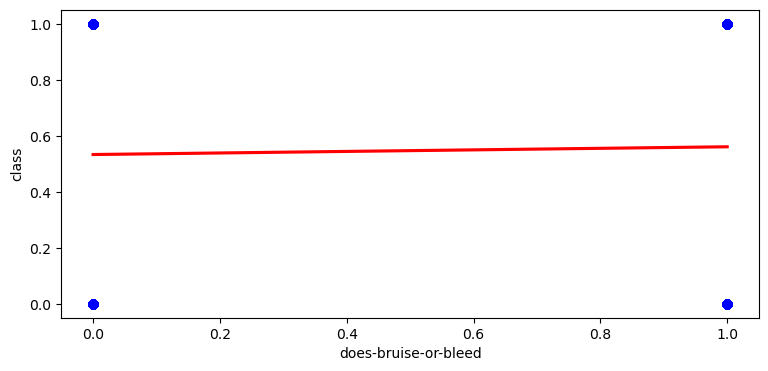

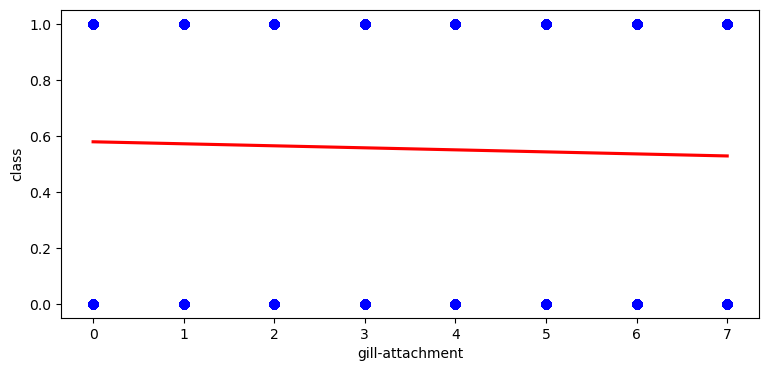

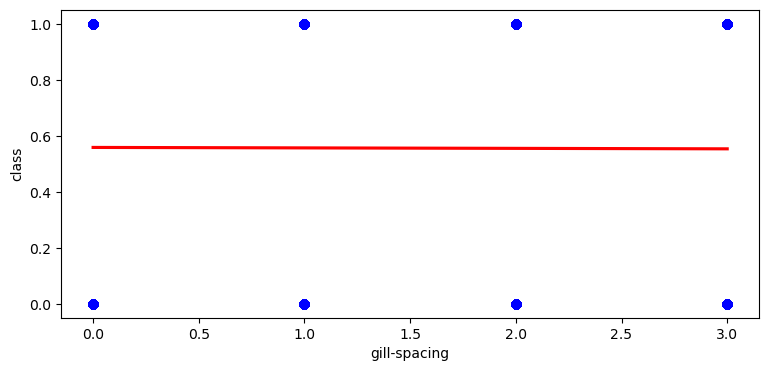

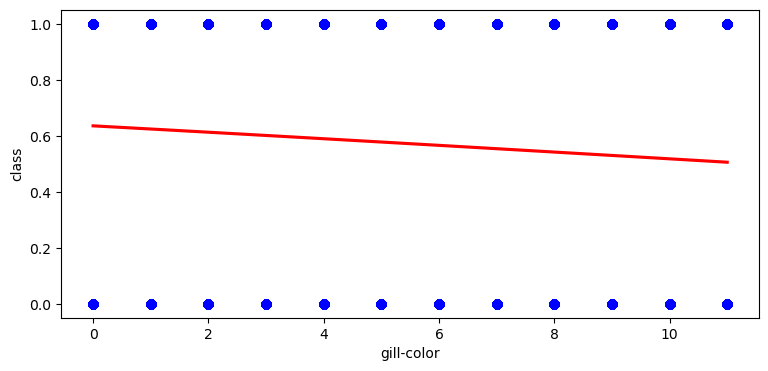

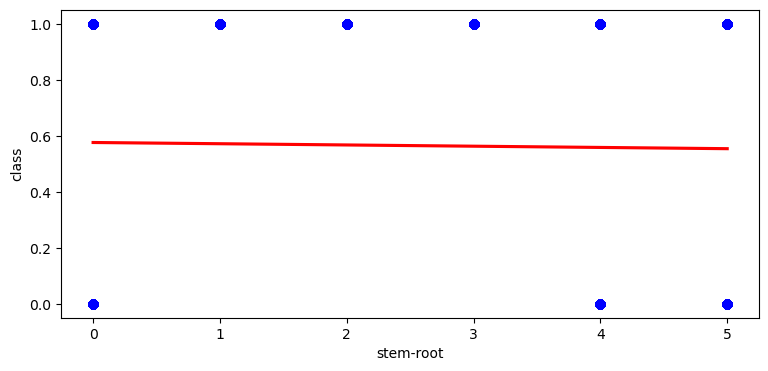

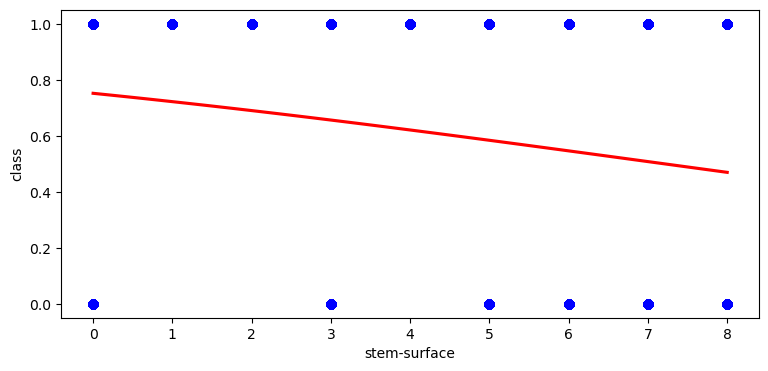

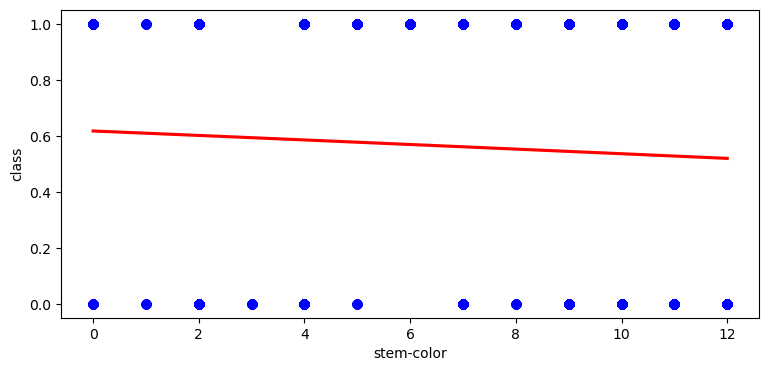

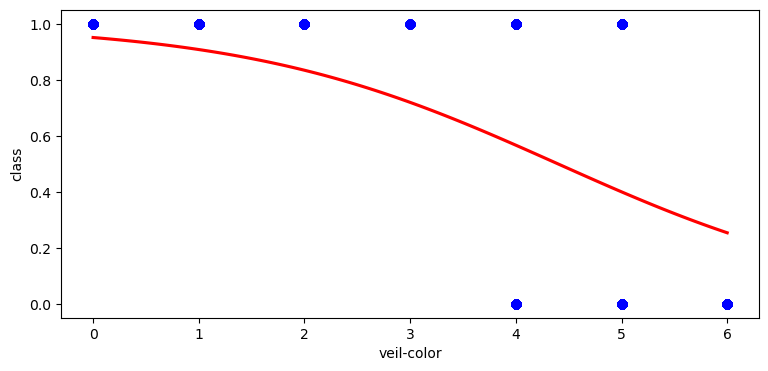

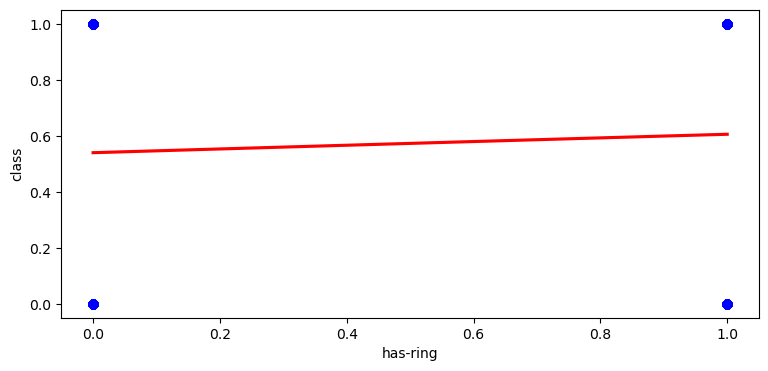

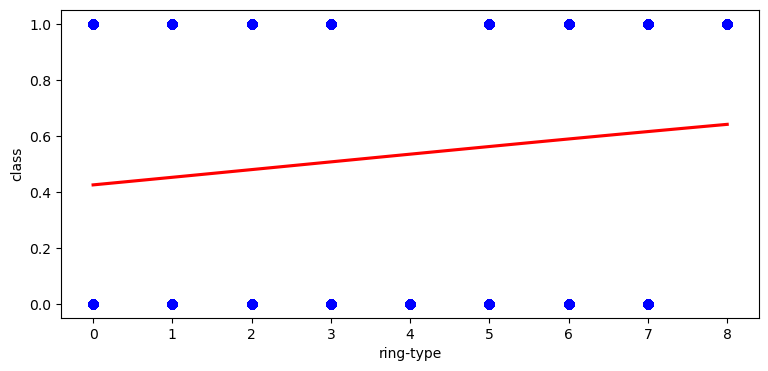

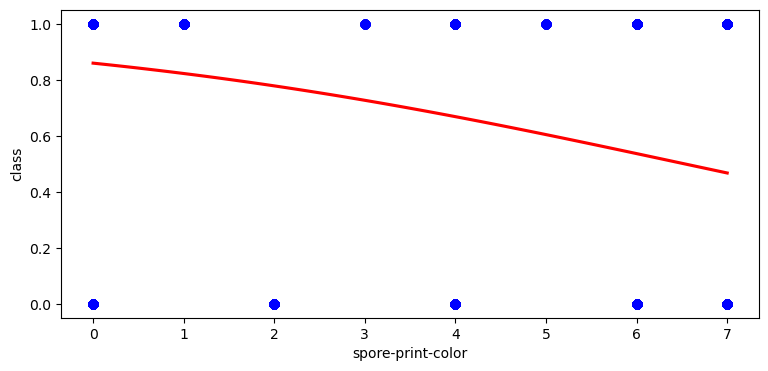

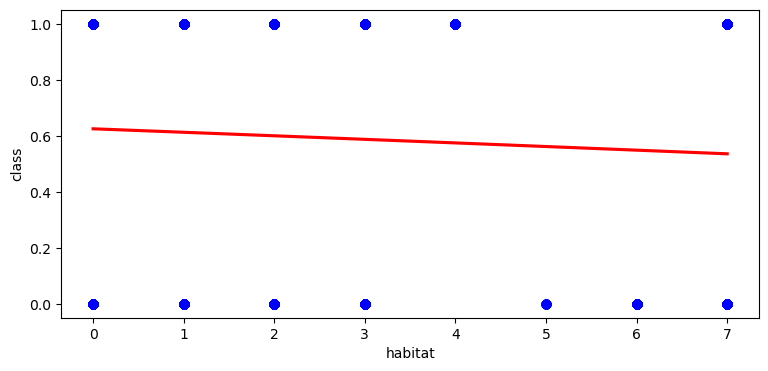

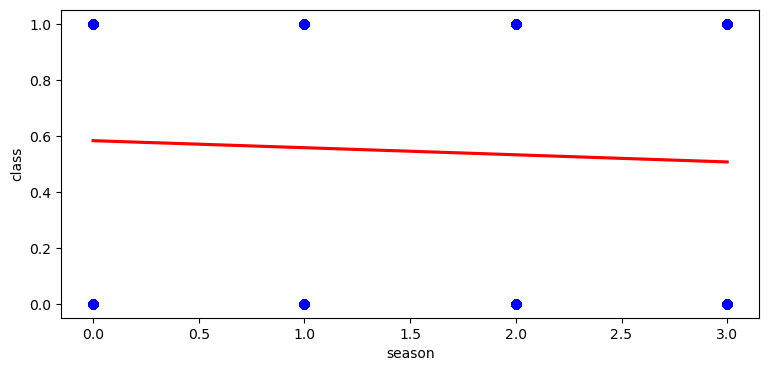

In [23]:
# Predict class of train set using train set of predictor varaibles using the Logistic Regression model
# Predict class corresponding to the predictors using the logistic model
edible_train_pred = logreg.predict(predictor_train)

# Plot the logistic regression curve of the train data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_train:
    f = plt.figure(figsize=(9, 4))
    sb.regplot(data = predictor_train, x = column, y = edible_train, logistic = True, ci = None,
          scatter_kws = {'color':'blue'}, line_kws={'color':'red'})

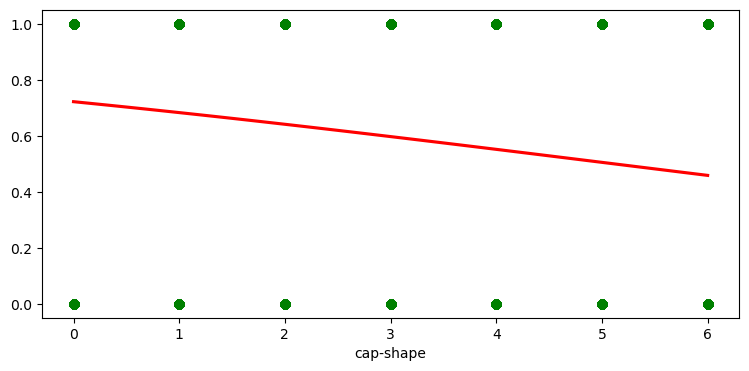

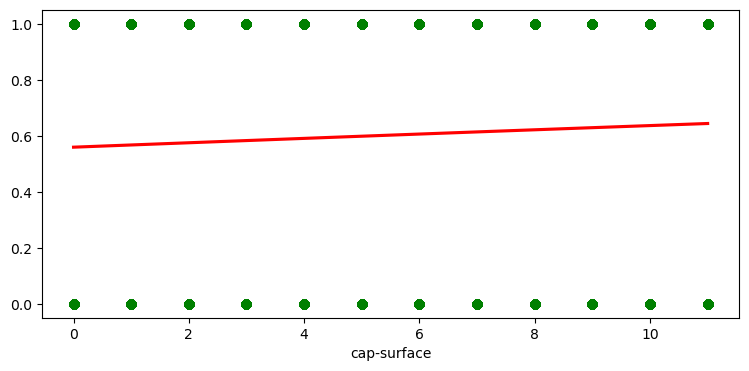

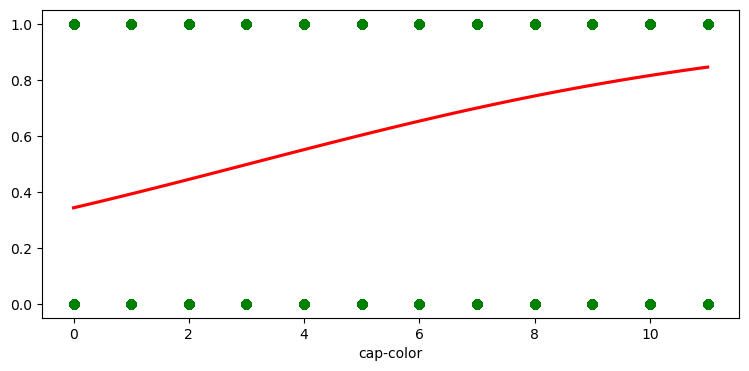

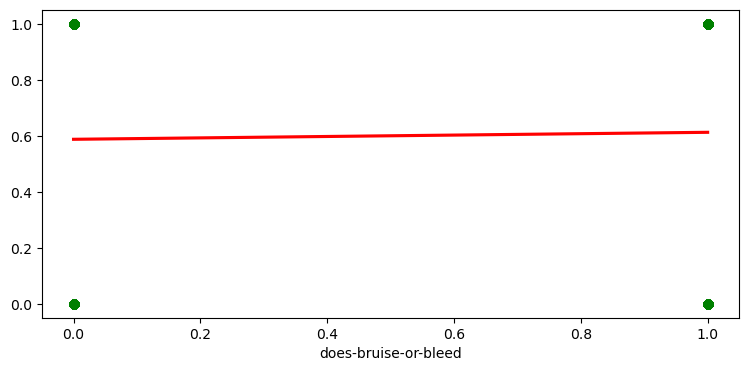

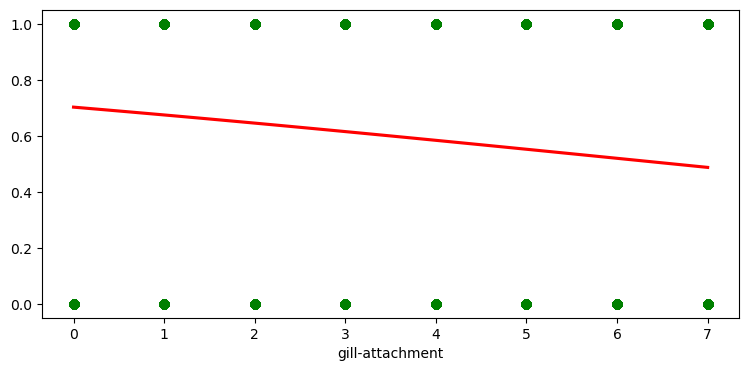

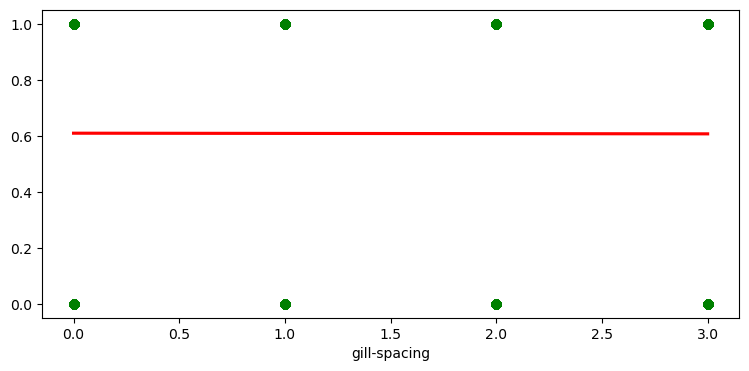

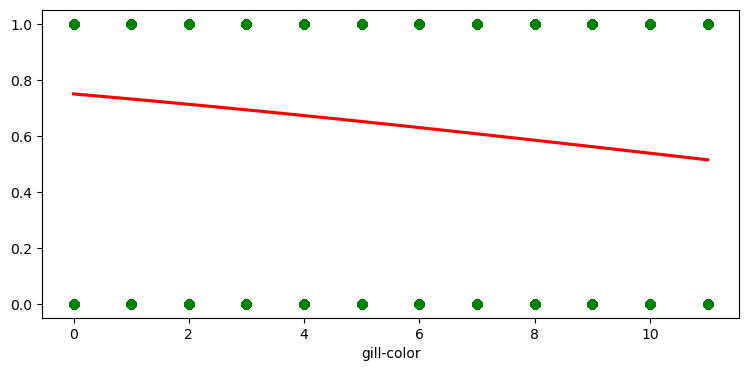

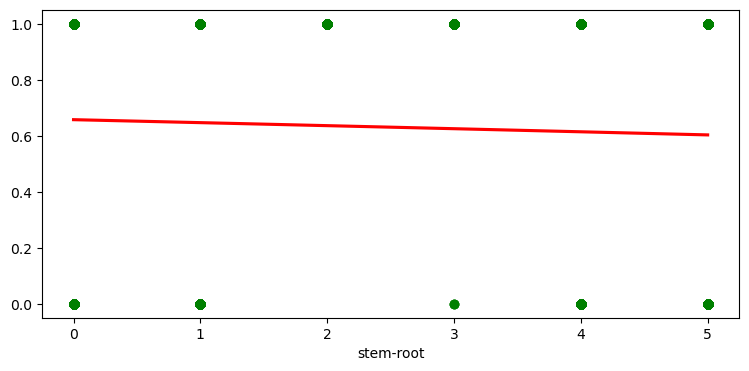

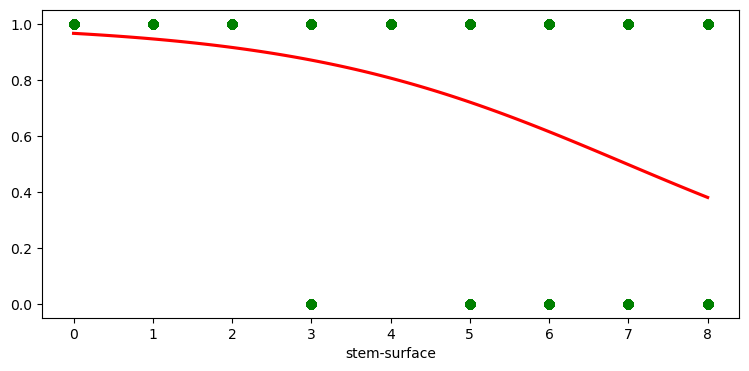

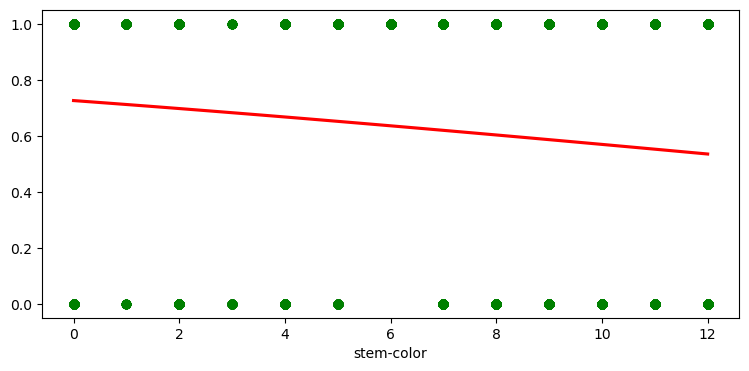

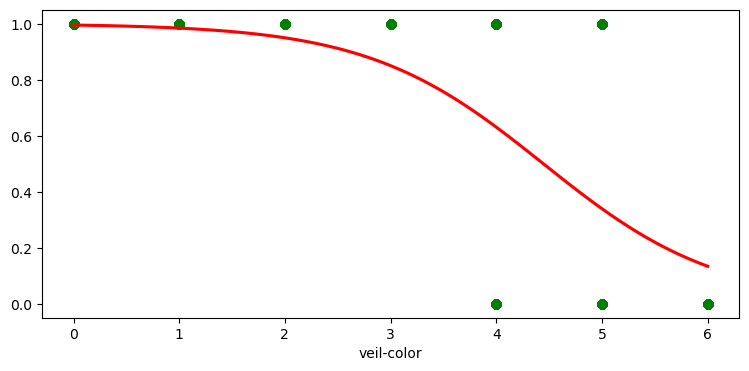

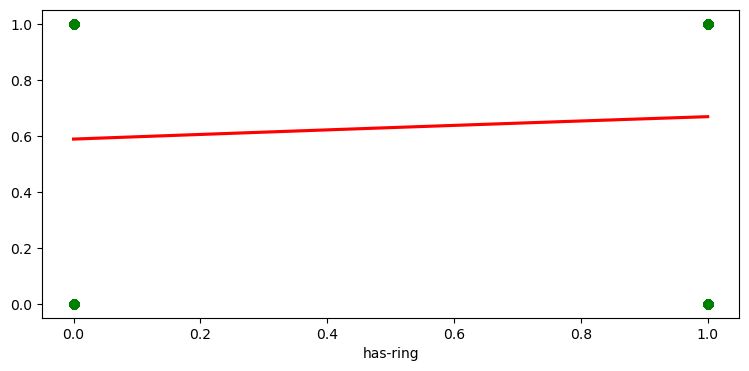

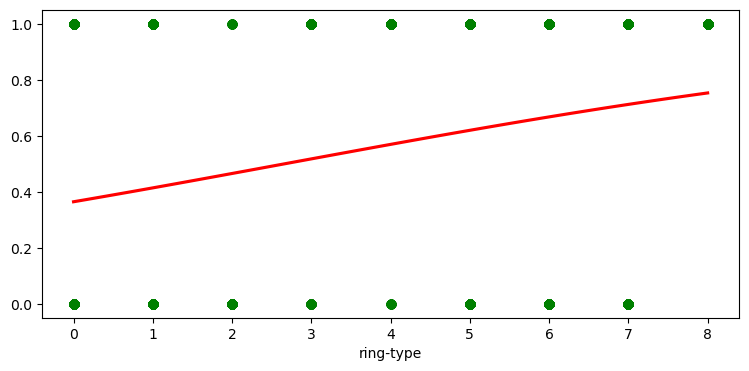

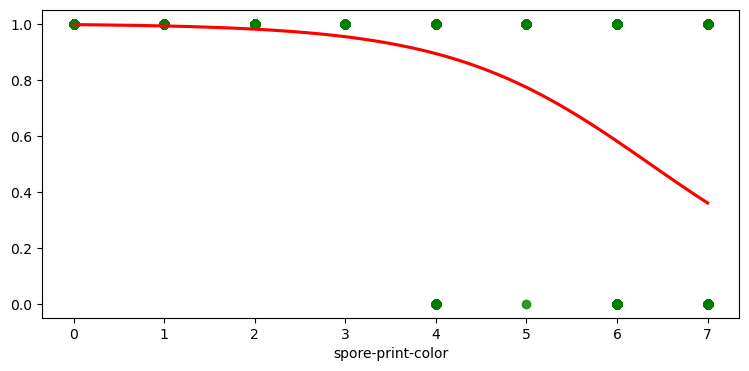

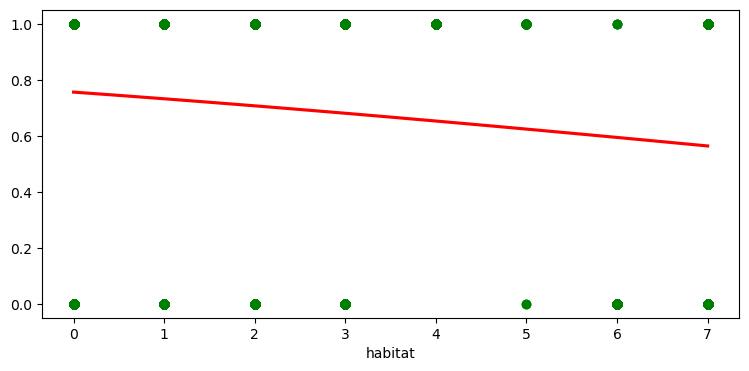

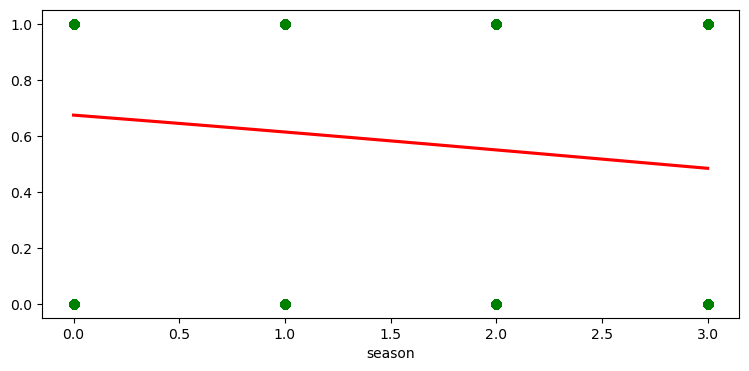

In [24]:
# Plot the logistic regression curve of the predicted edible train set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_train:
    f = plt.figure(figsize=(9, 4))
    sb.regplot(data = predictor_train, x = column, y = edible_train_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'})

Accuracy : 0.635
              precision    recall  f1-score   support

           0       0.60      0.53      0.56     21705
           1       0.66      0.72      0.69     27150

    accuracy                           0.64     48855
   macro avg       0.63      0.62      0.63     48855
weighted avg       0.63      0.64      0.63     48855



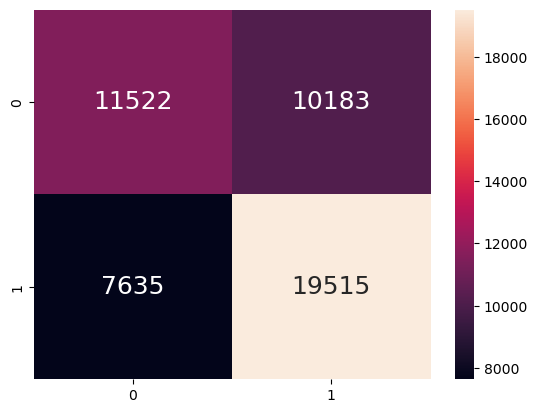

In [25]:
# Print the confusion matrix of the train data set
sb.heatmap(confusion_matrix(edible_train, edible_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", round(accuracy_score(edible_train, edible_train_pred), 3))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

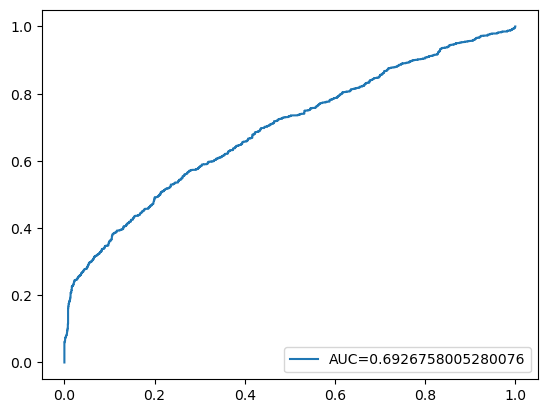

In [26]:
# Define metrics
edible_train_pred_proba = logreg.predict_proba(predictor_train)[::,1]
fpr, tpr, _ = roc_curve(edible_train, edible_train_pred_proba)
auc = roc_auc_score(edible_train, edible_train_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### The Test Set

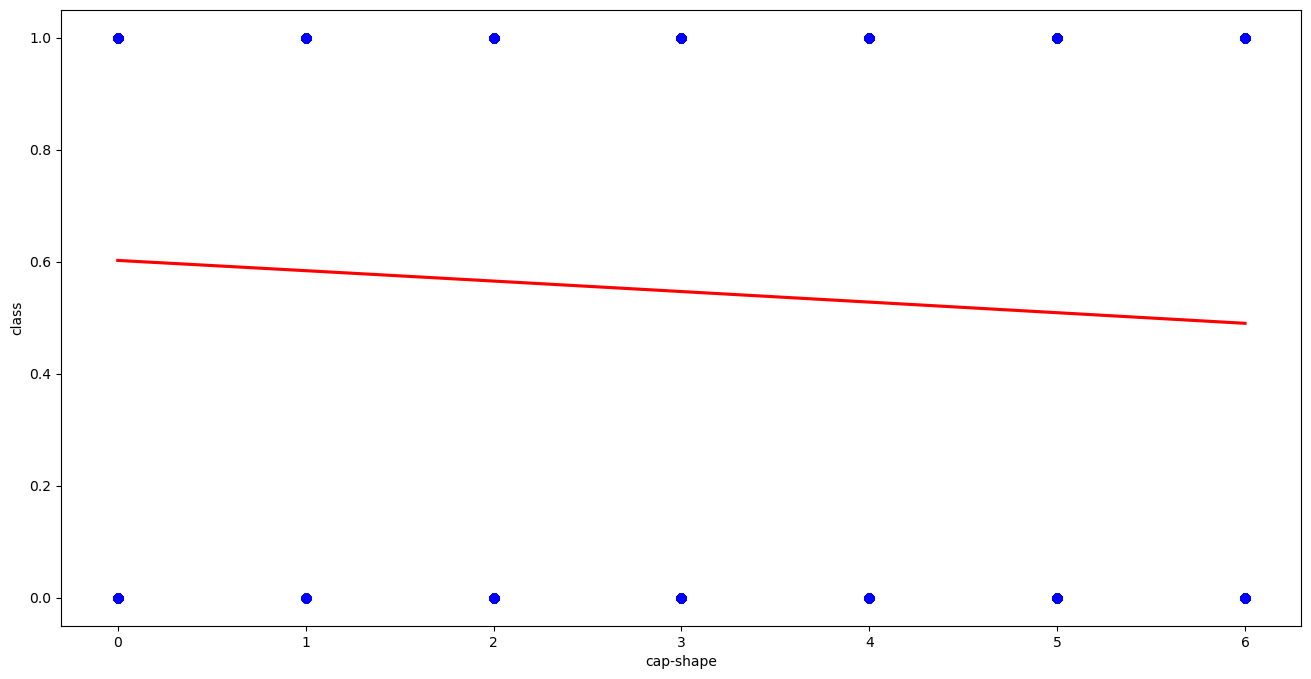

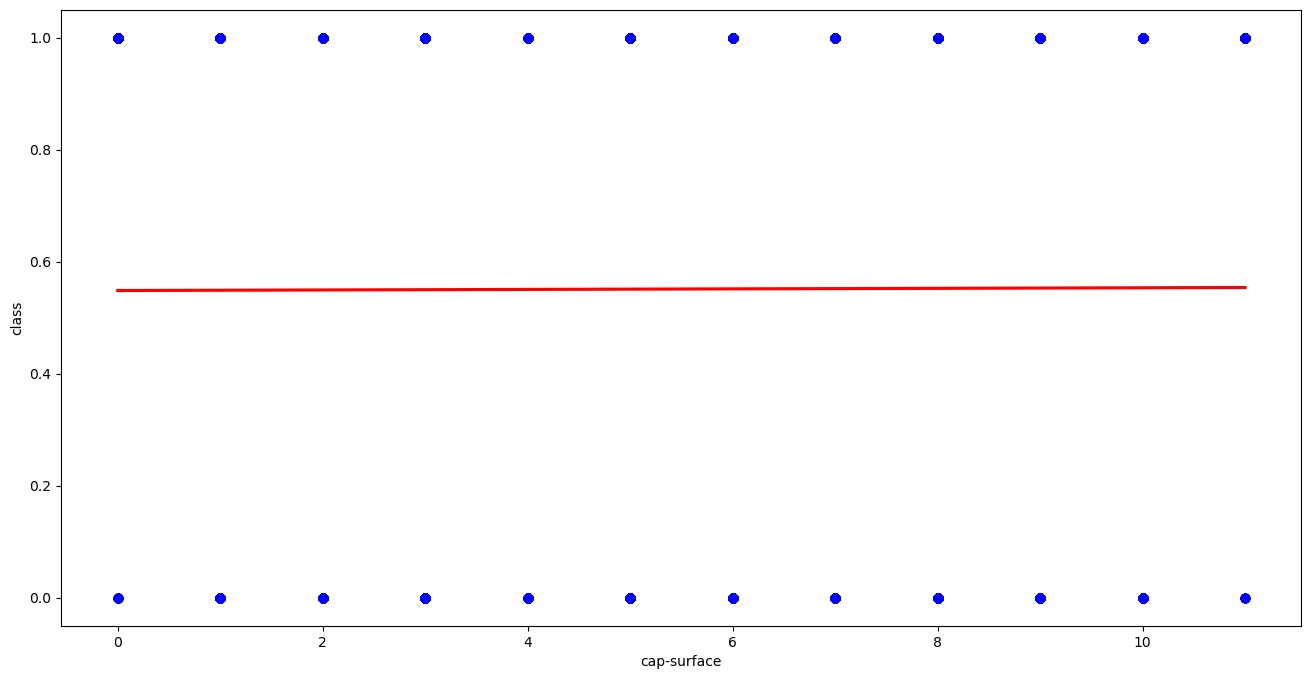

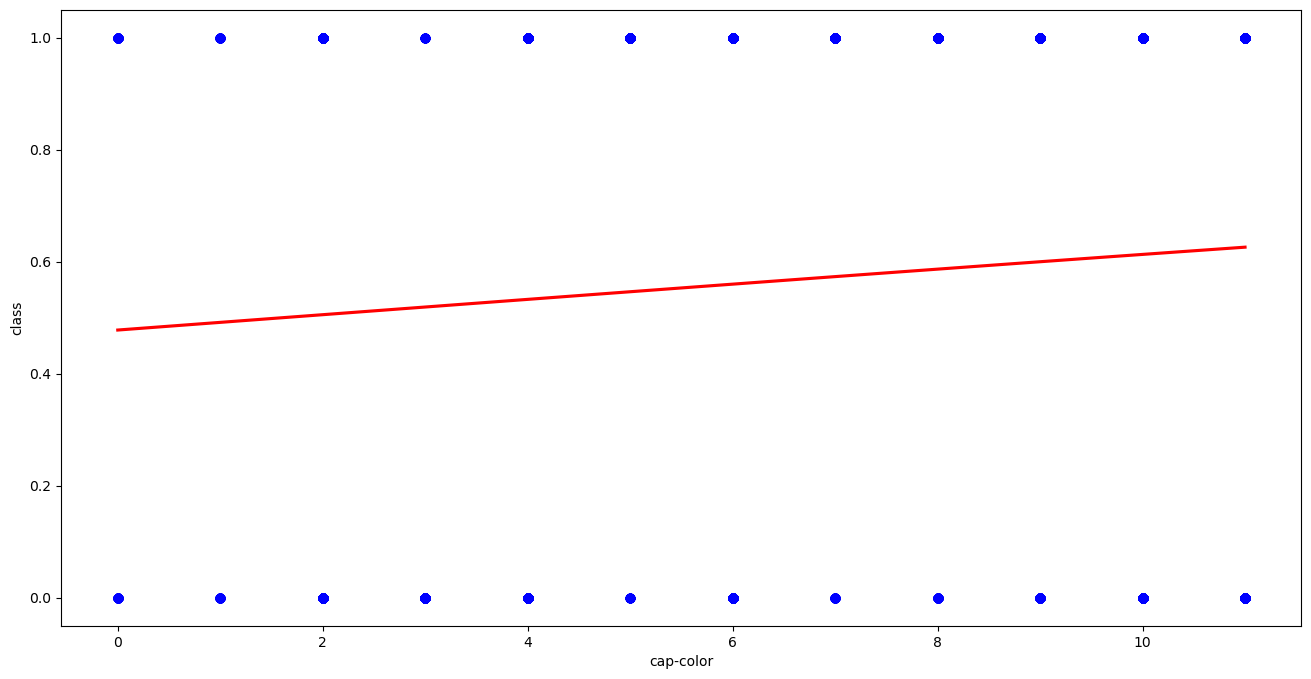

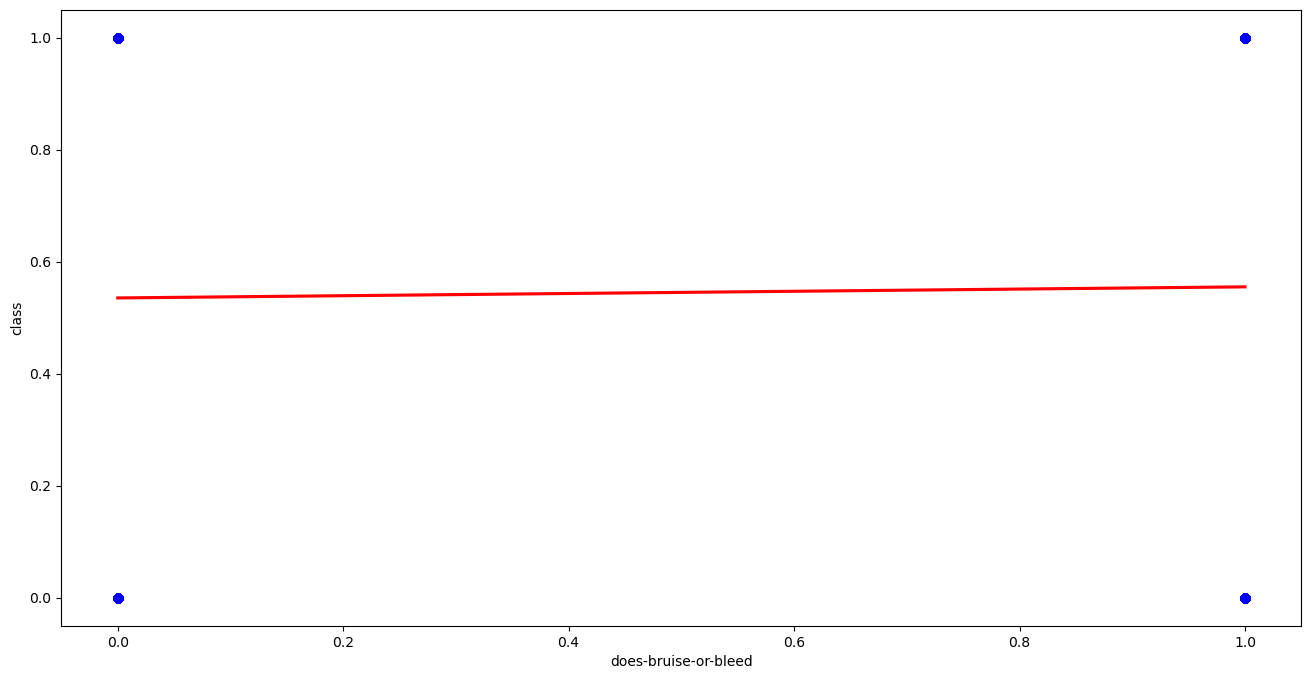

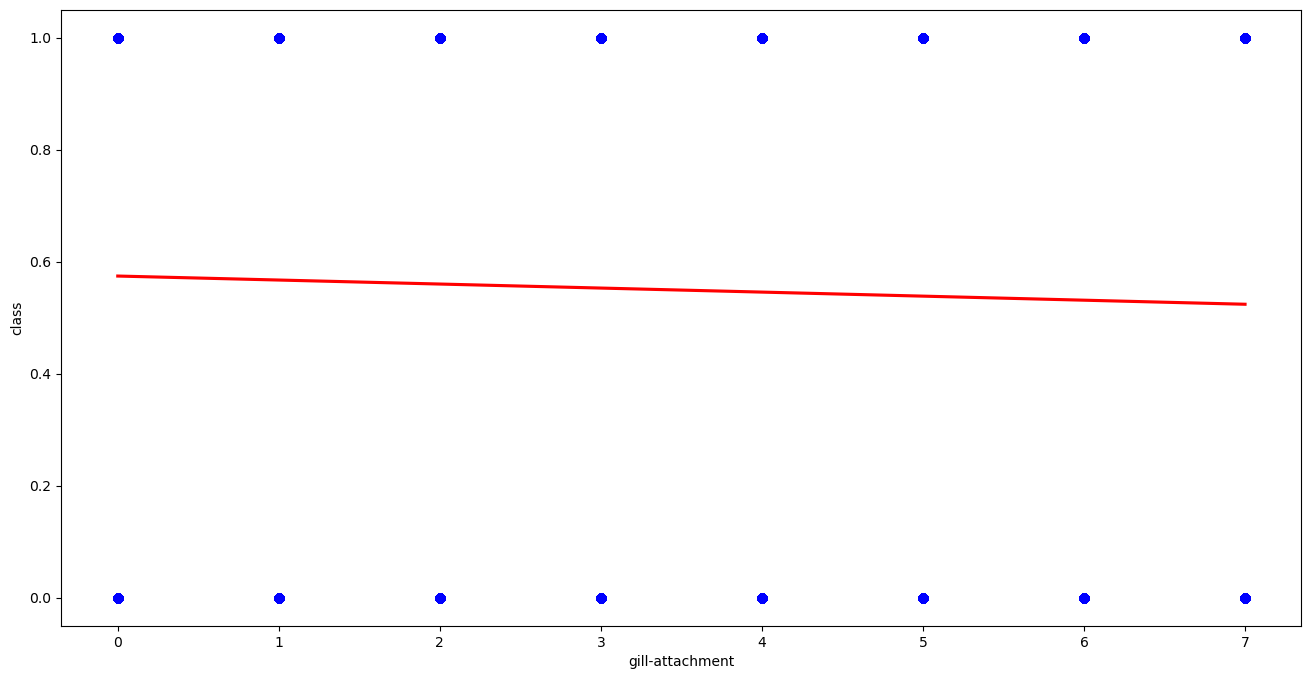

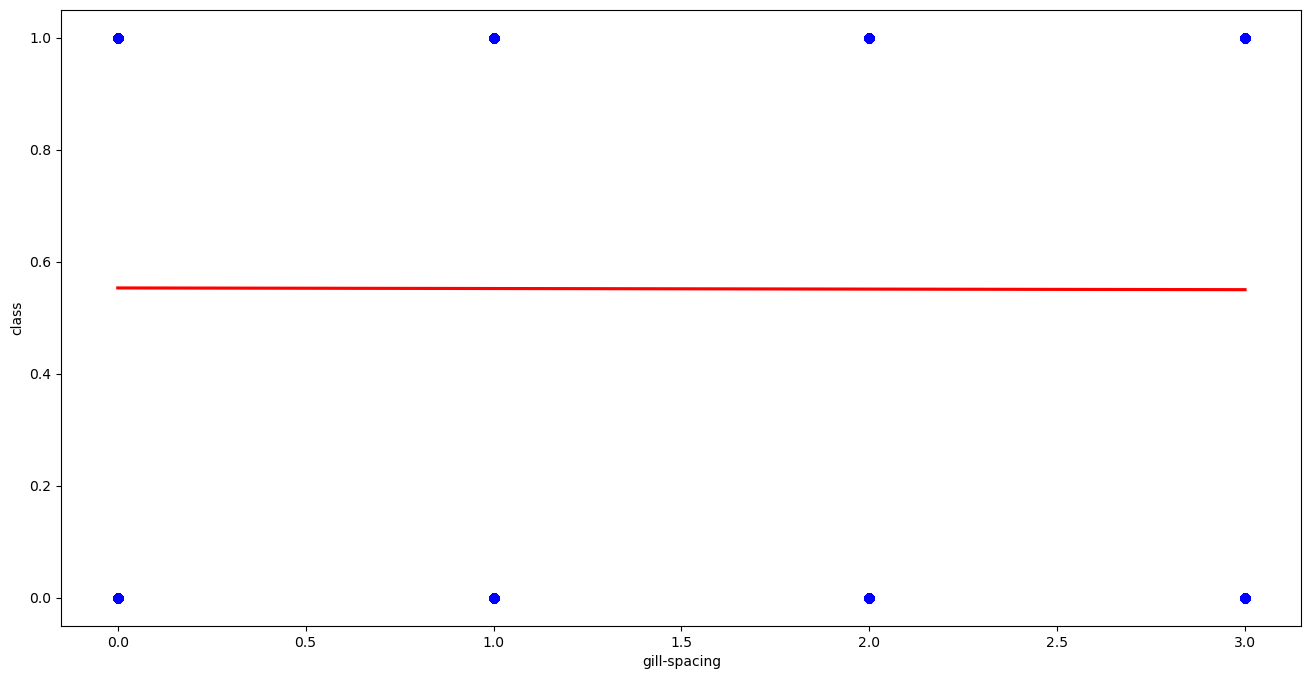

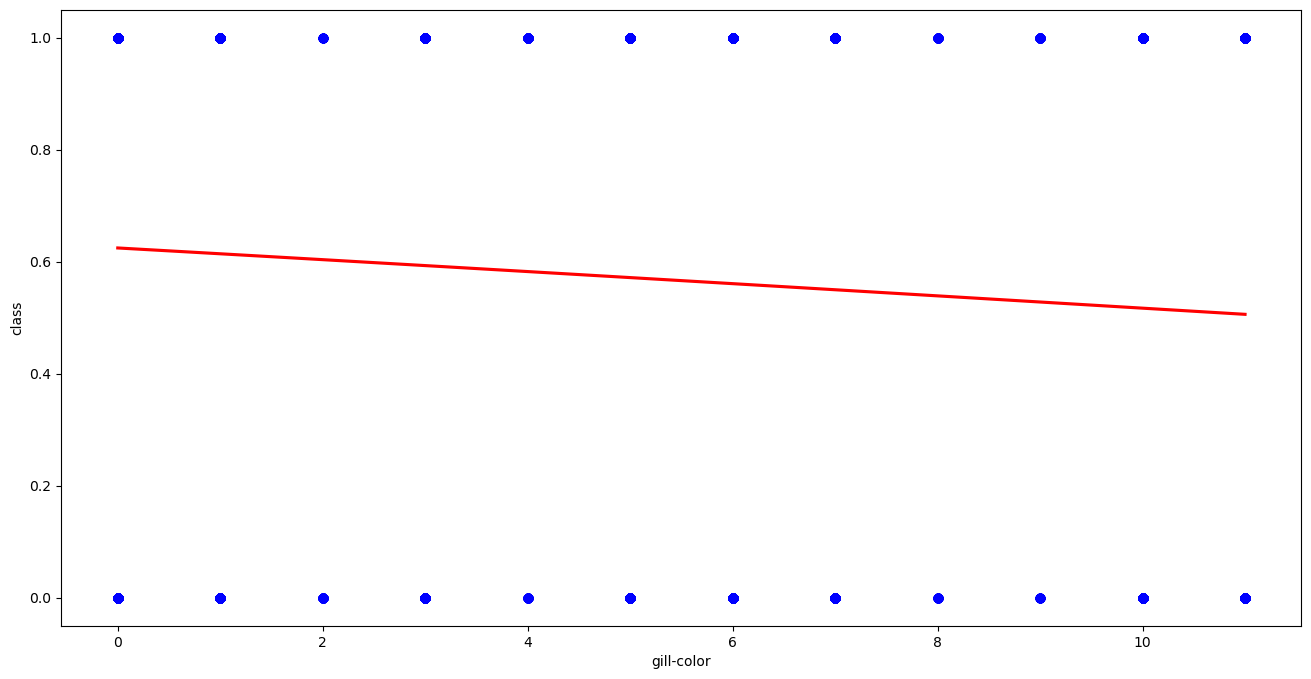

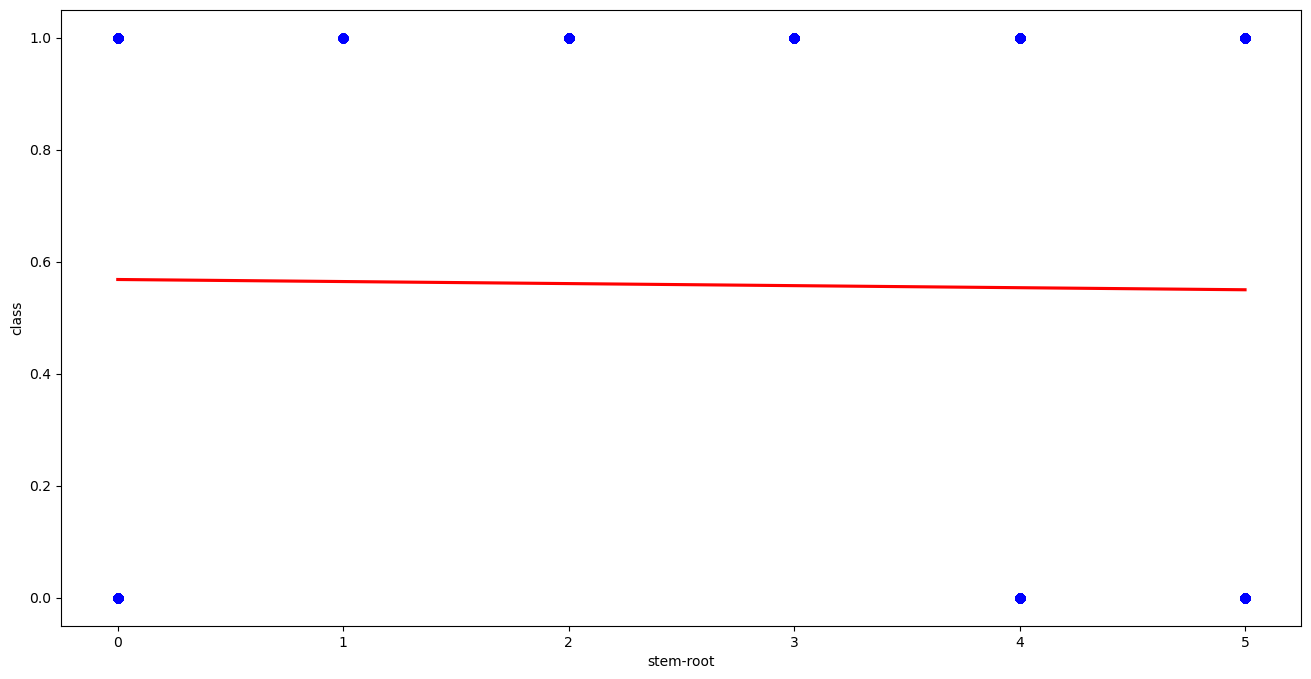

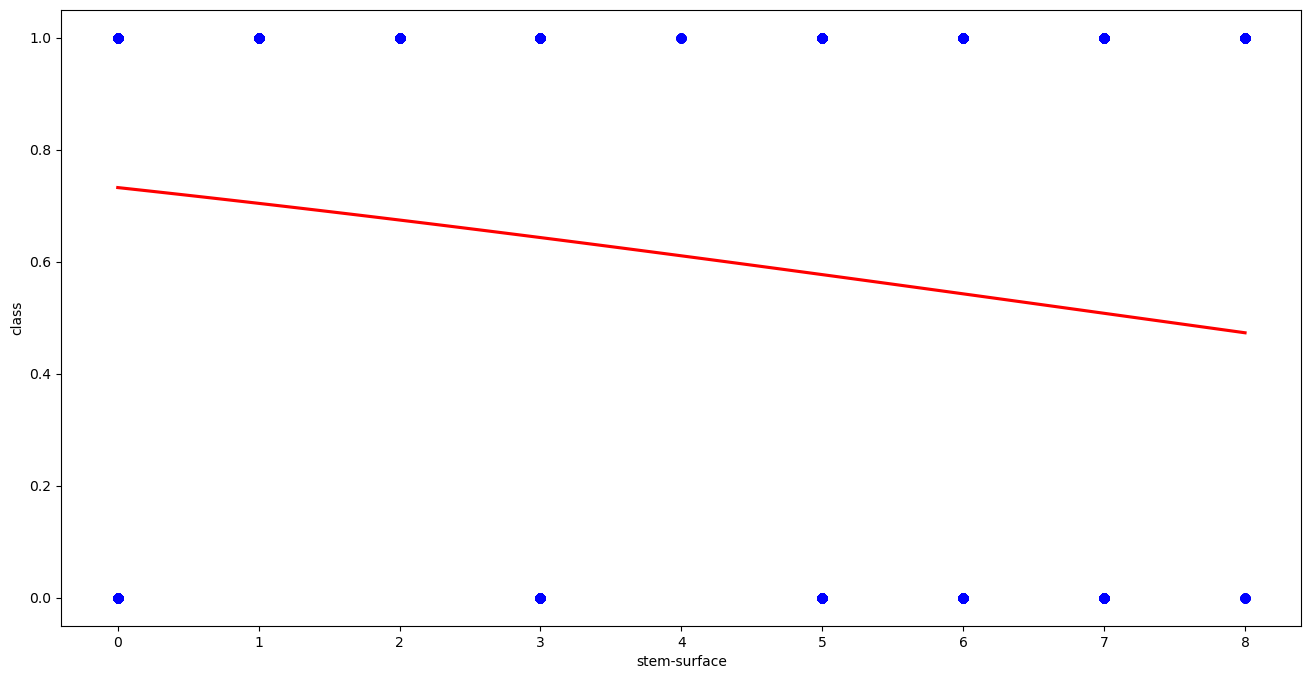

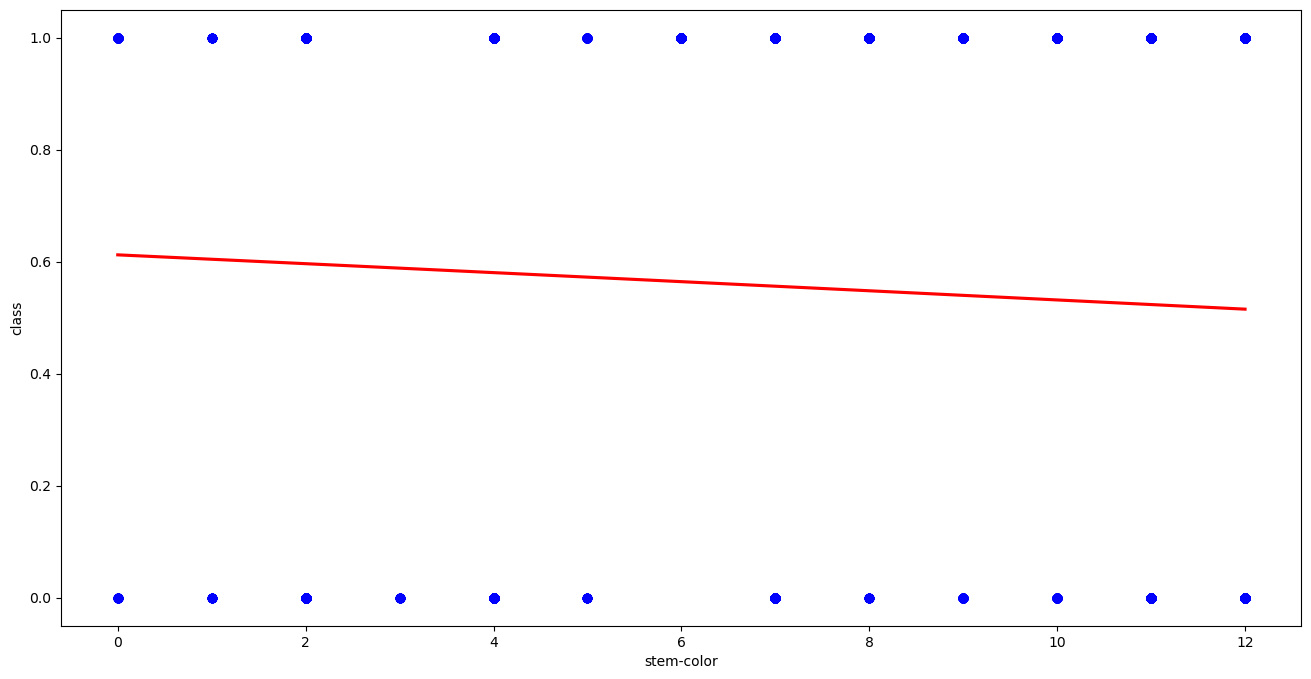

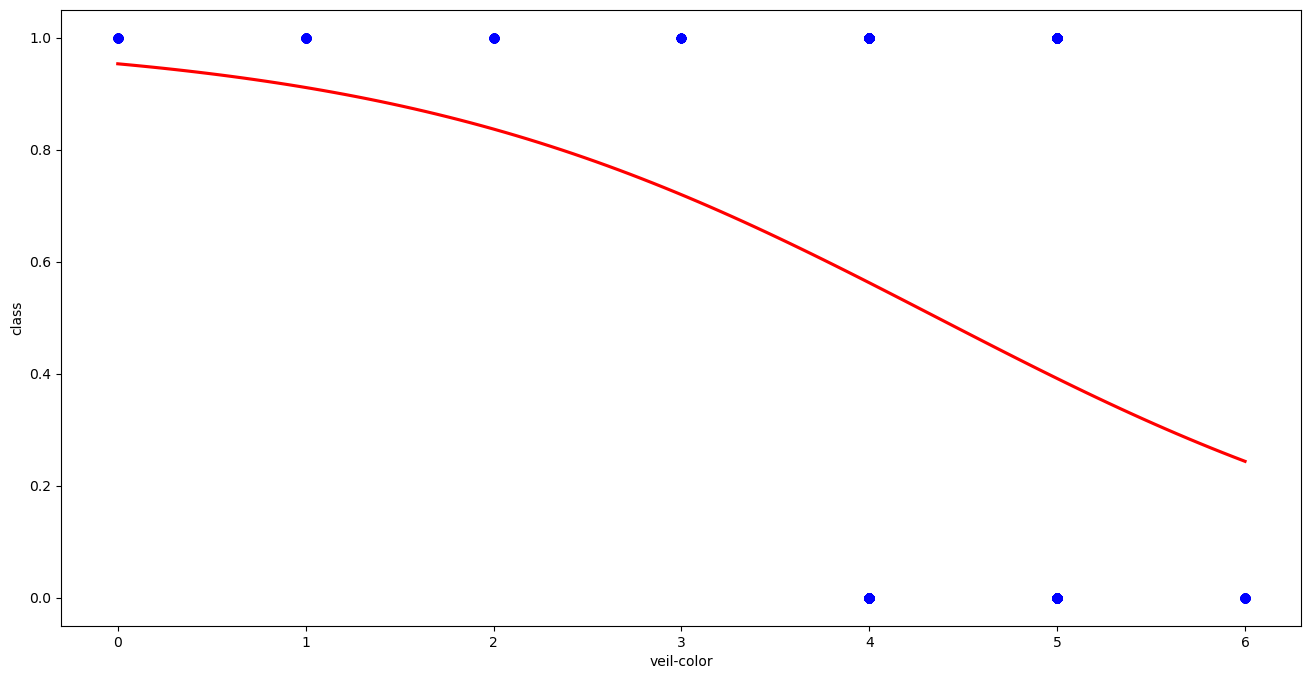

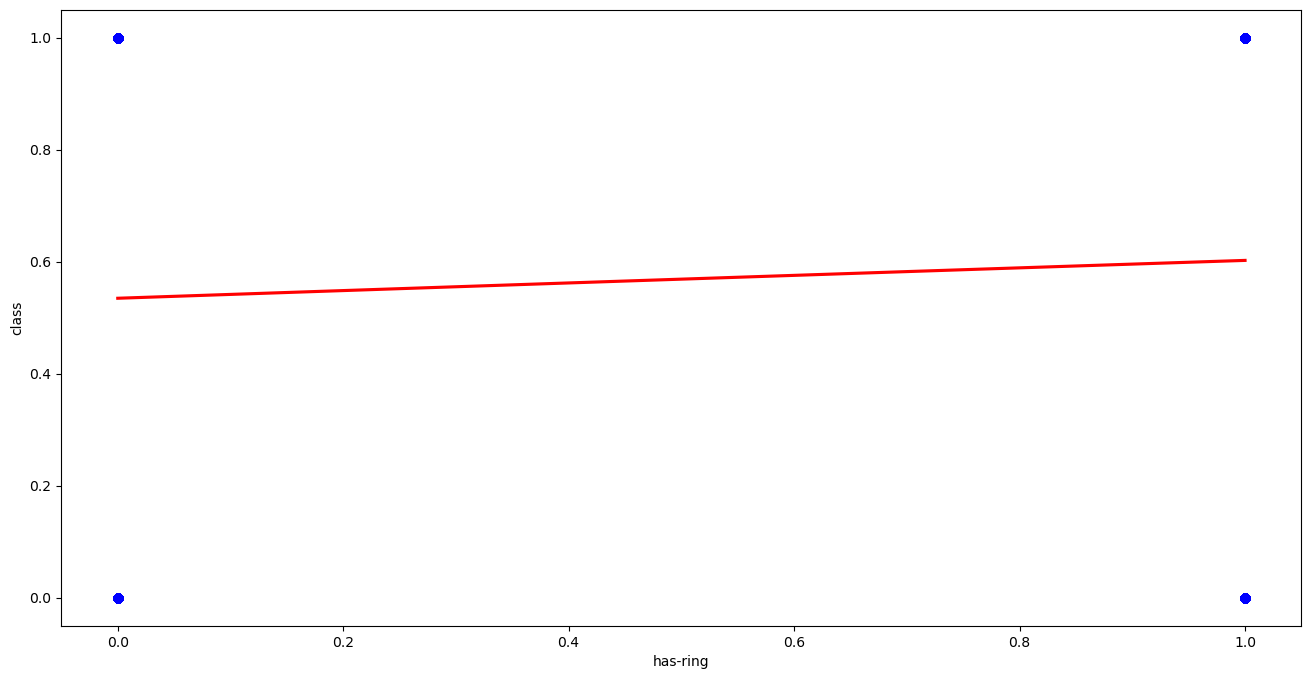

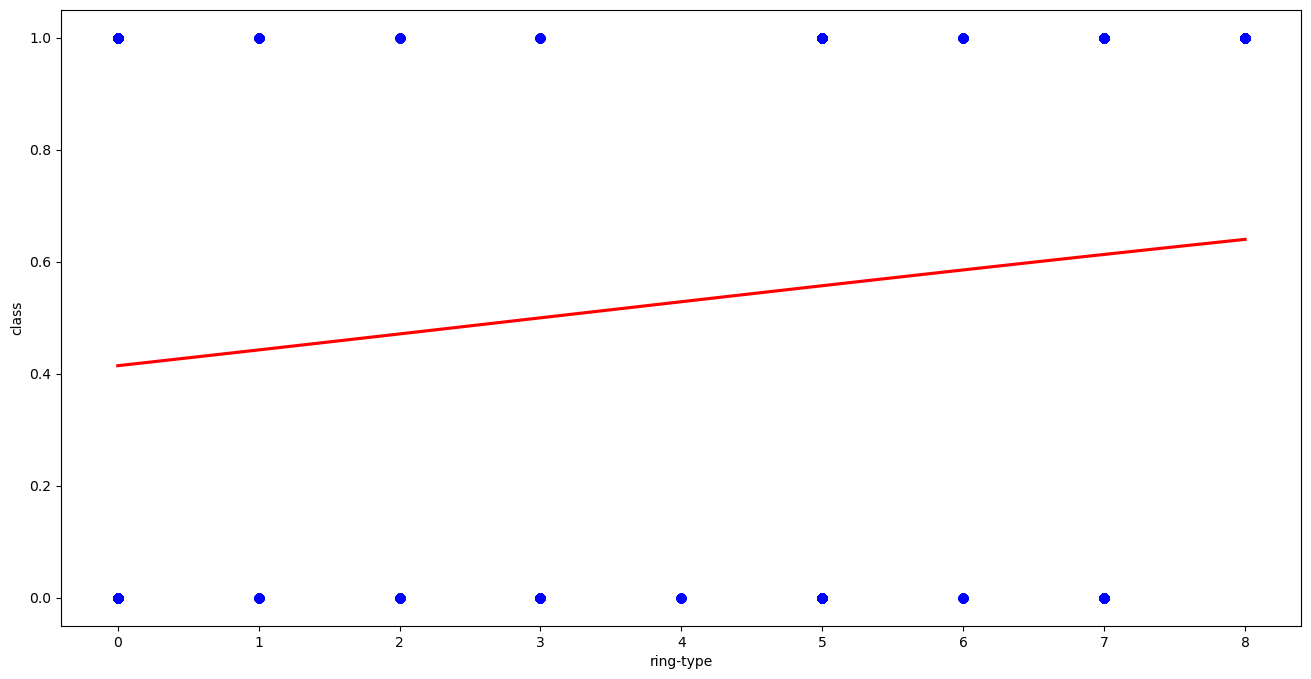

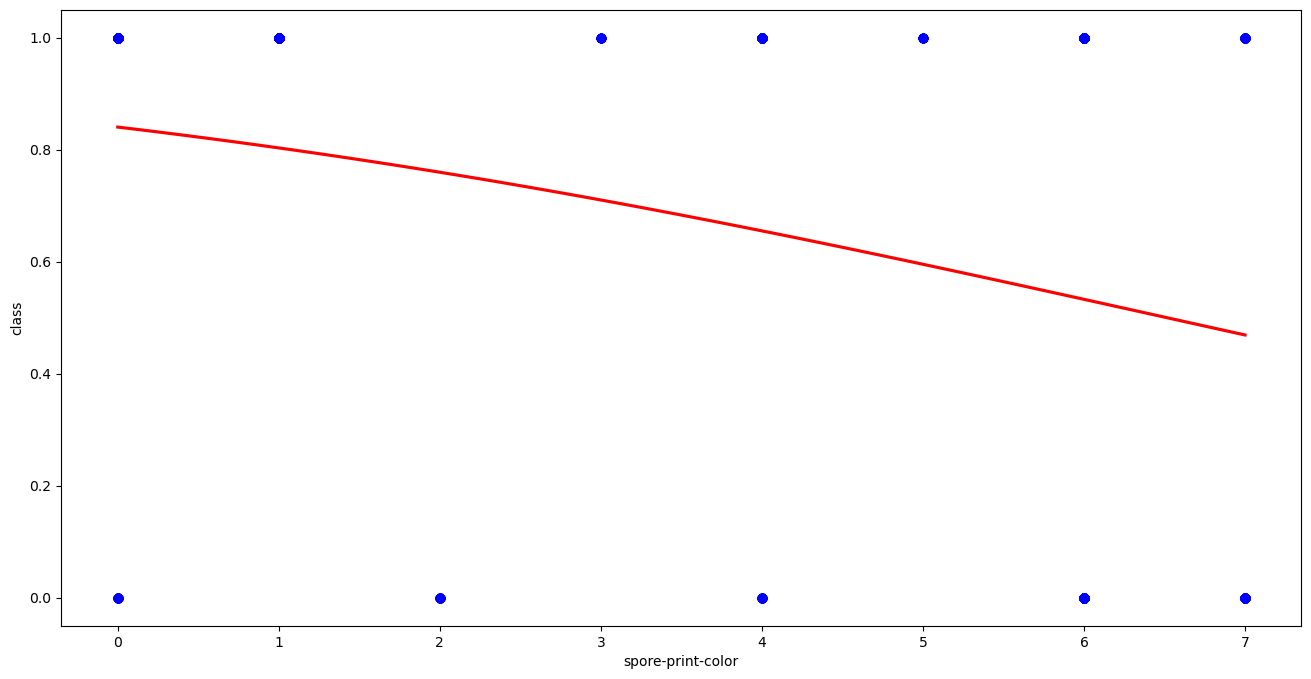

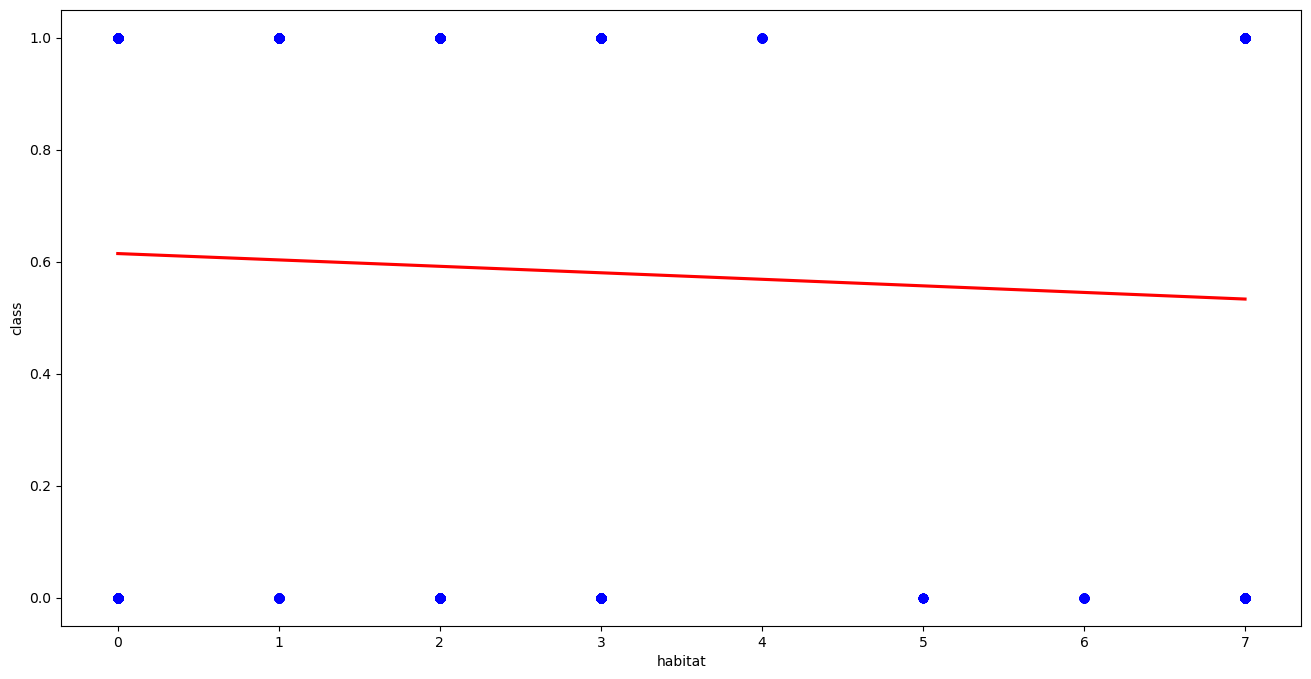

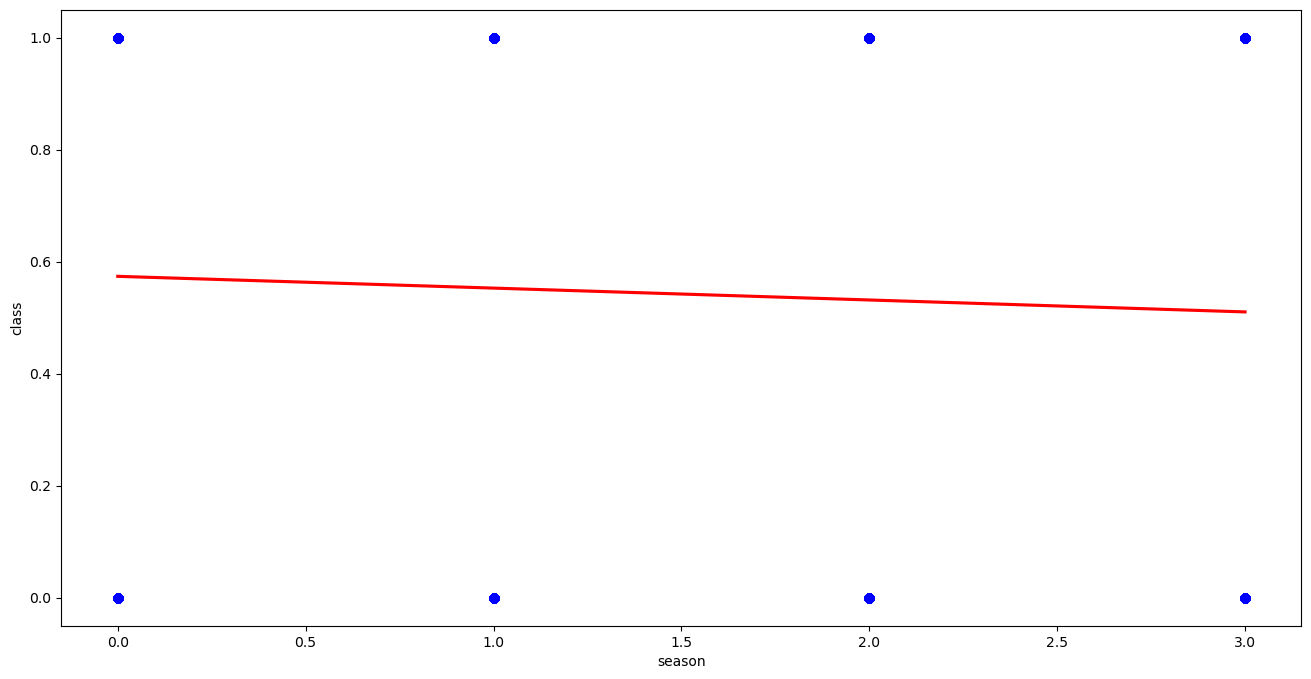

In [27]:
# Predict class of test set using test set of the predictor variables using the Linear Regression model
# Predict class corresponding to the predictors using the logistic model
edible_test_pred = logreg.predict(predictor_test)

# Plot the logistic regression curve of the test data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_test:
    f = plt.figure(figsize=(16, 8))
    sb.regplot(data = predictor_test, x = column, y = edible_test, logistic = True, ci = None,
          scatter_kws = {'color':'blue'}, line_kws={'color':'red'})

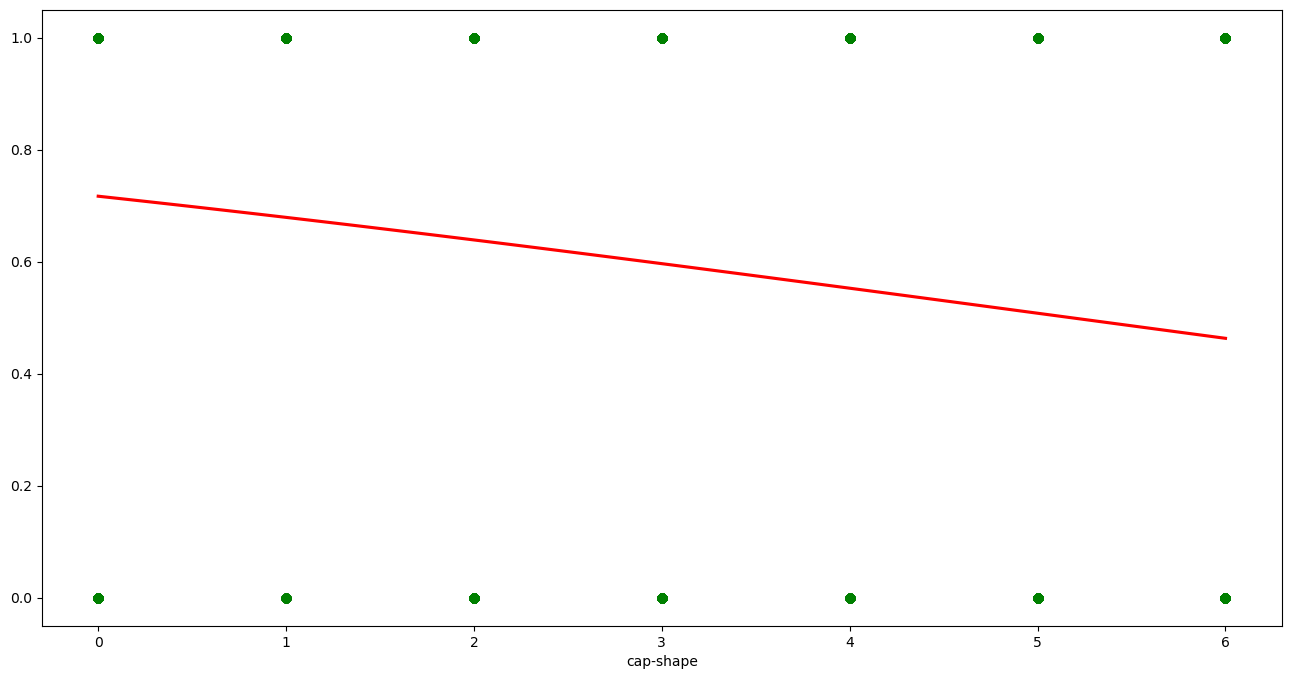

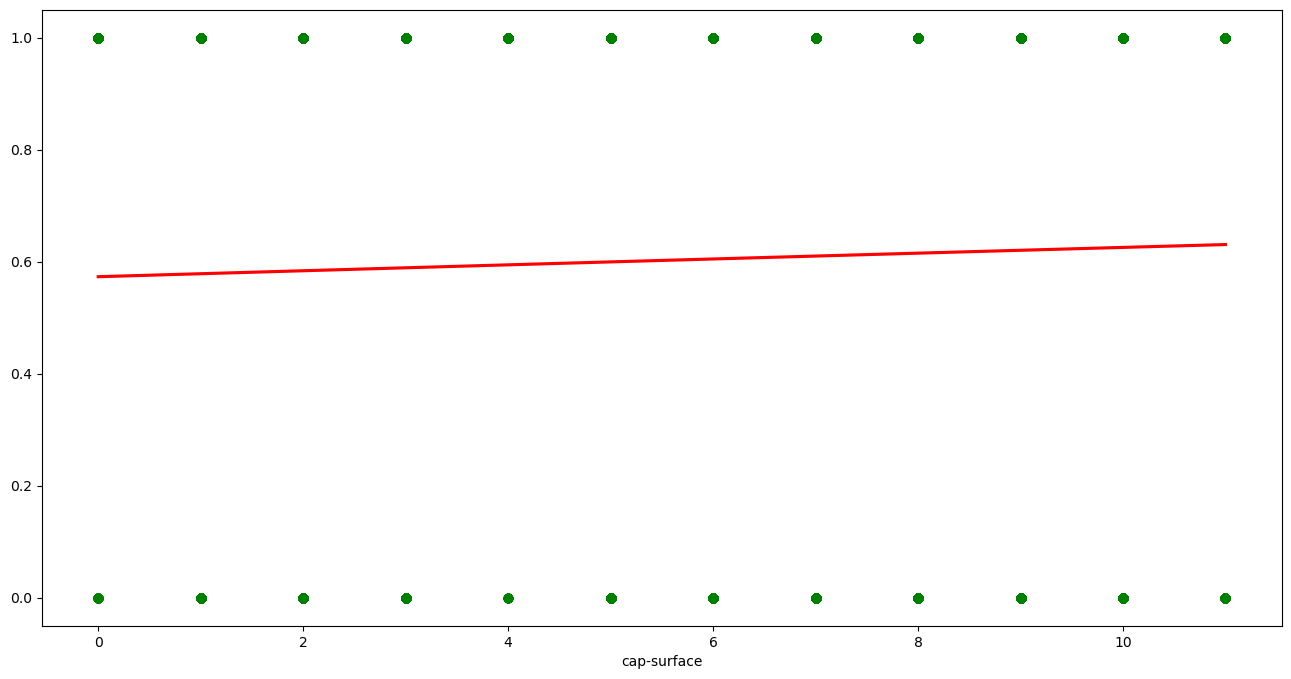

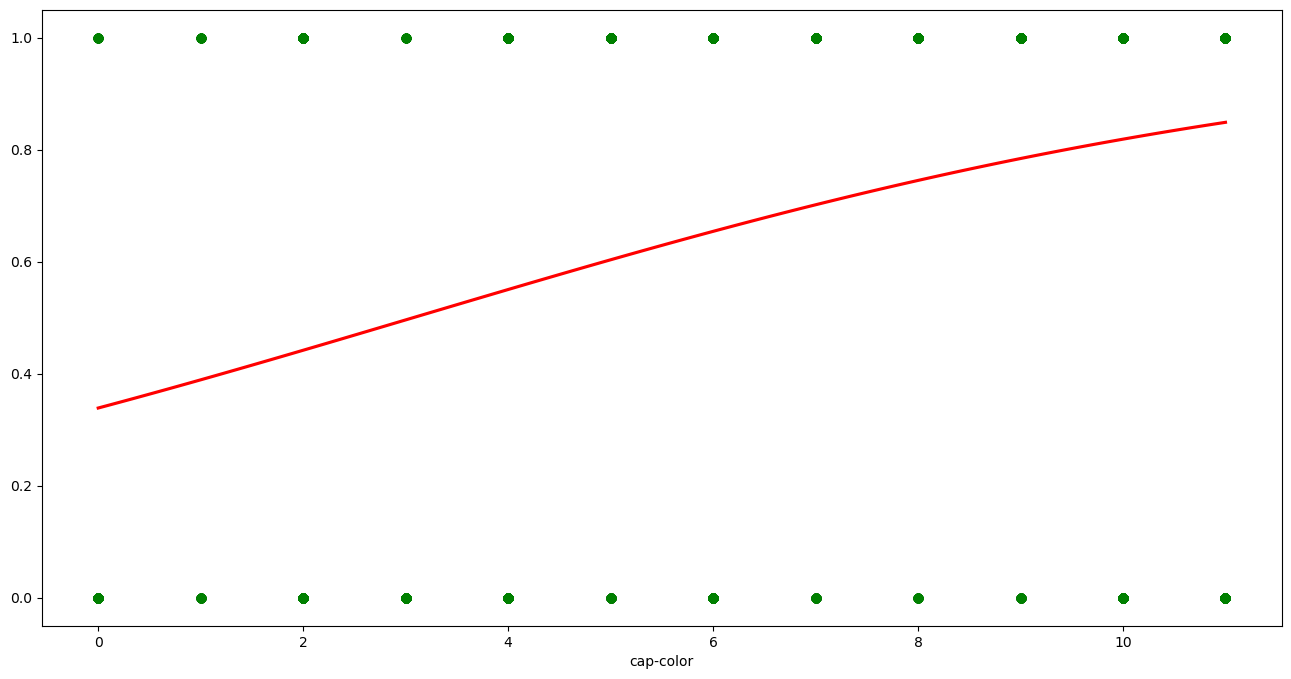

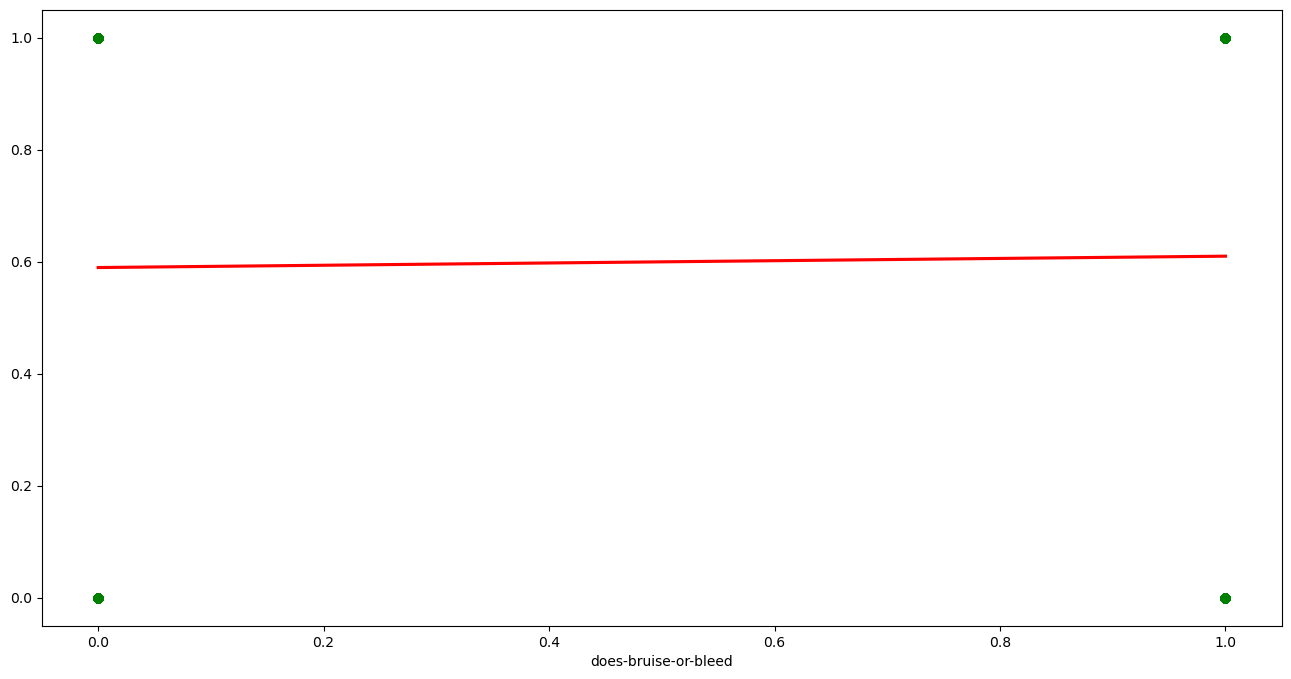

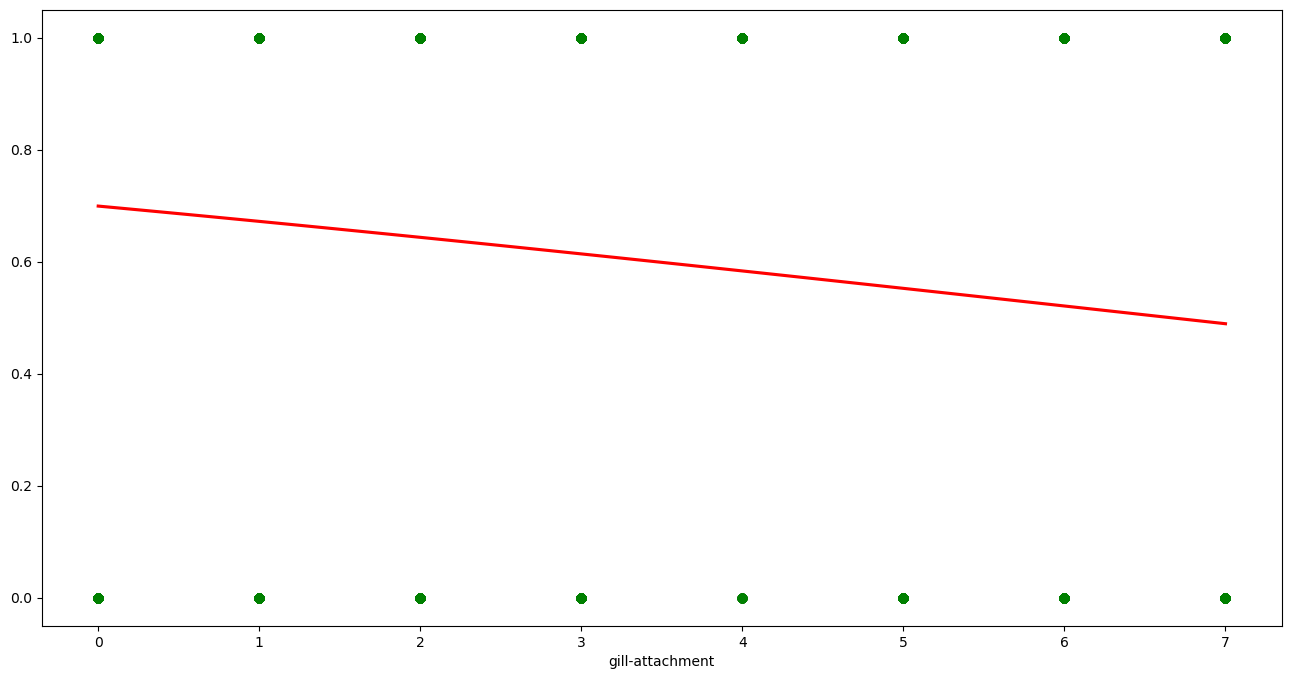

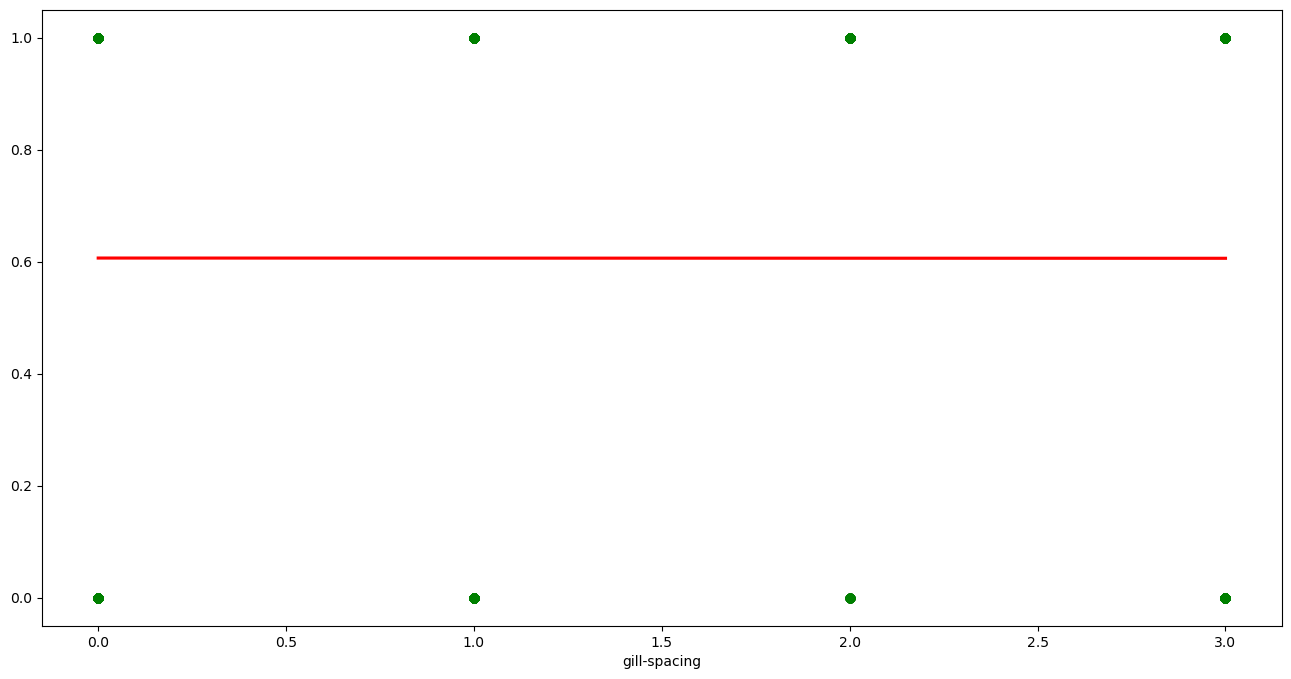

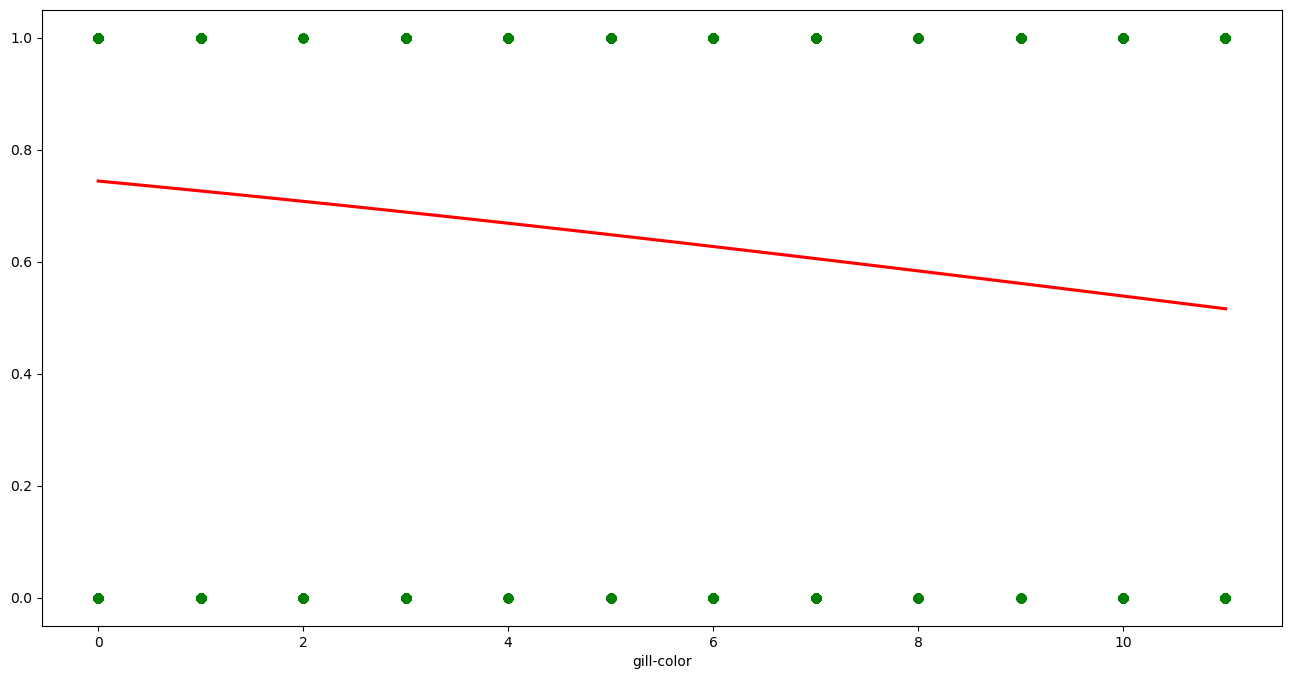

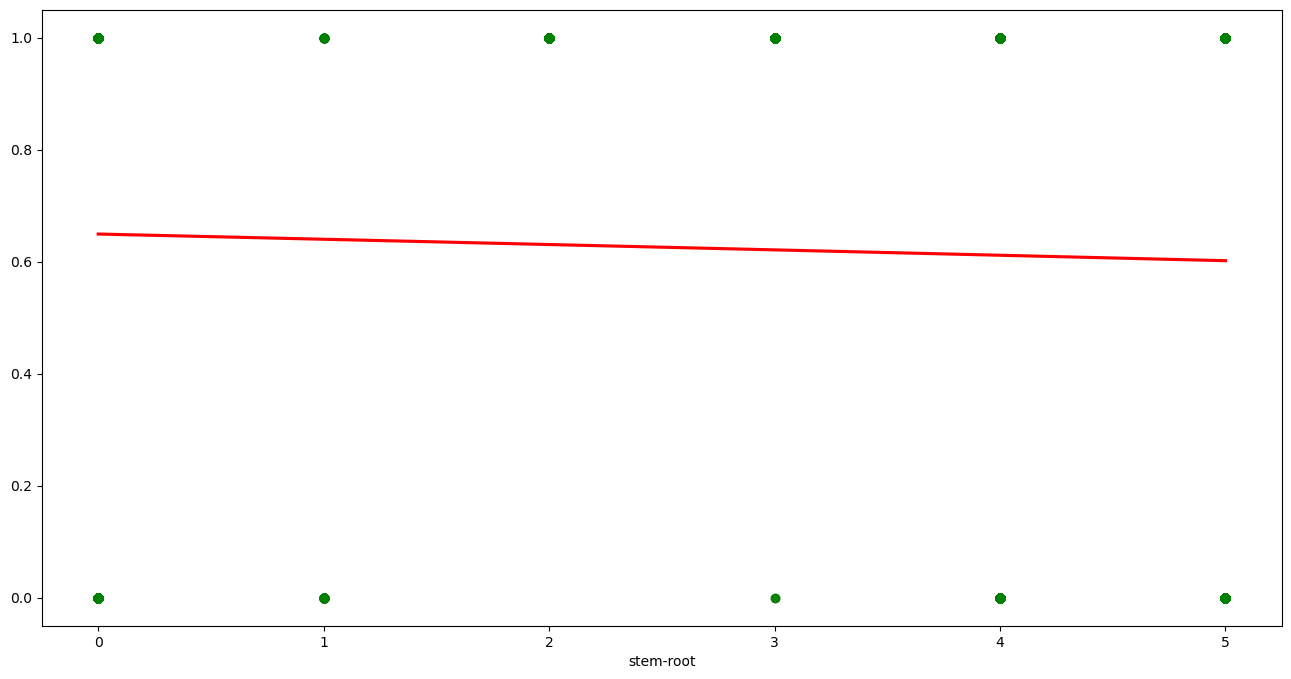

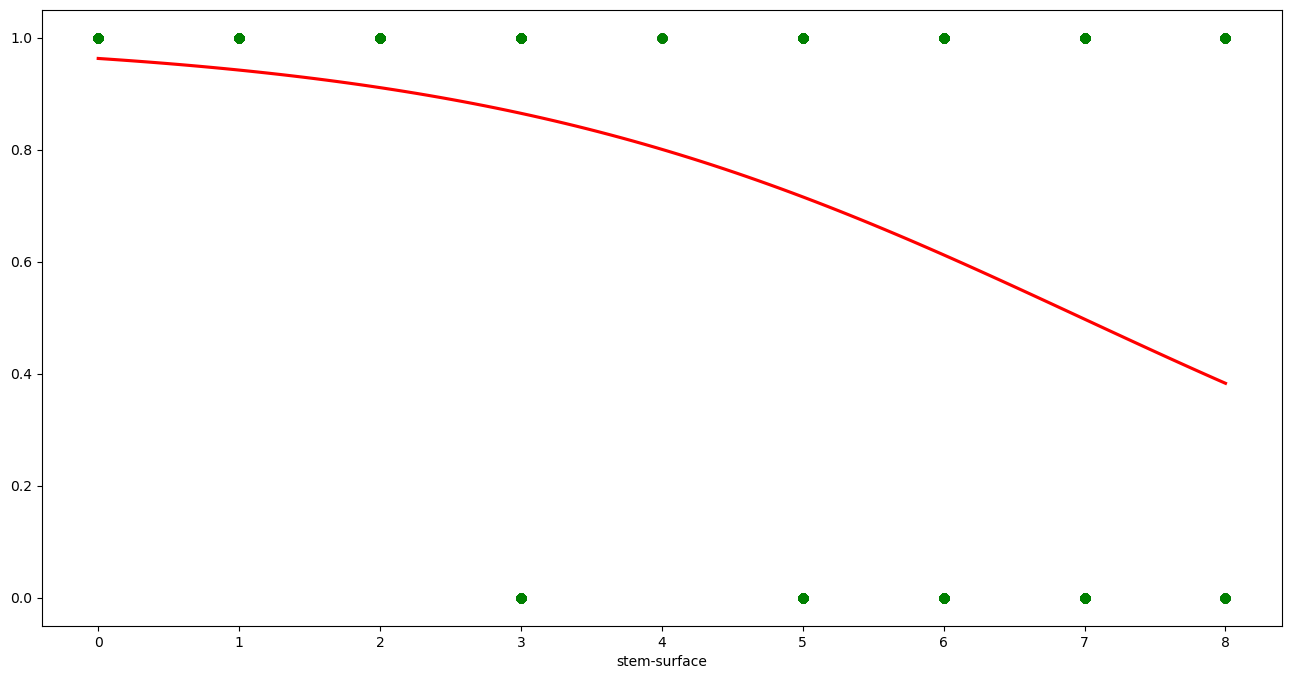

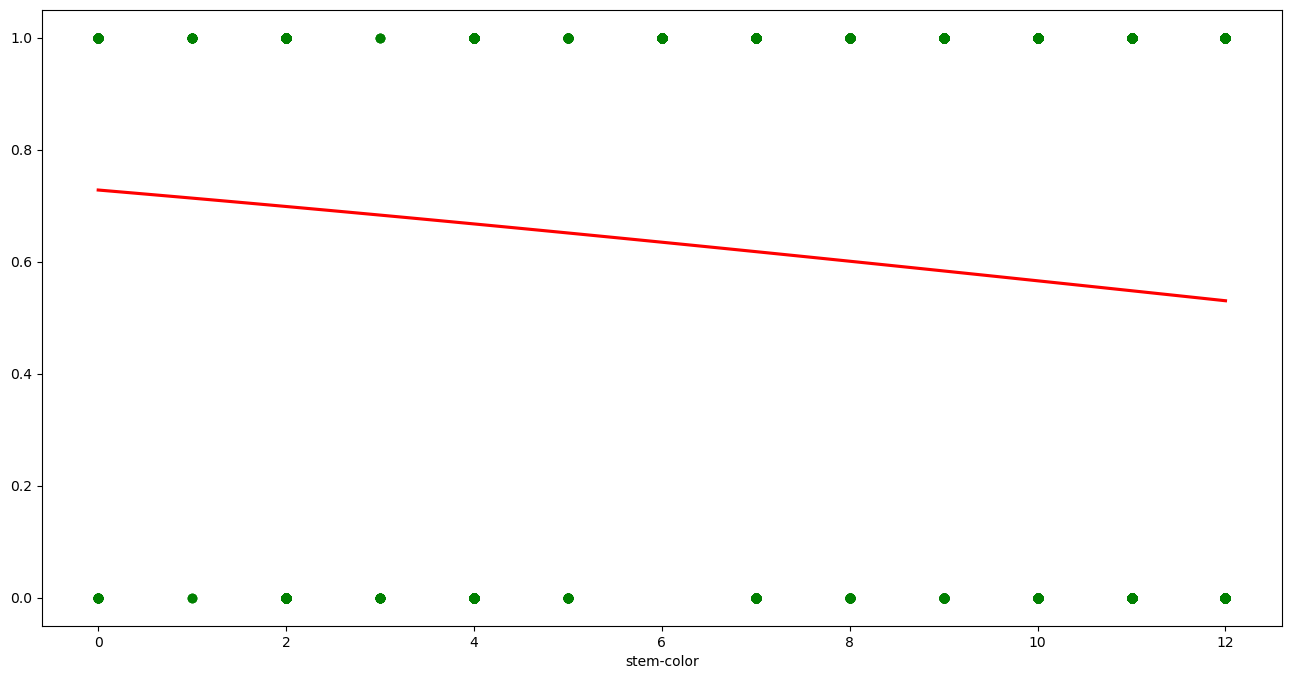

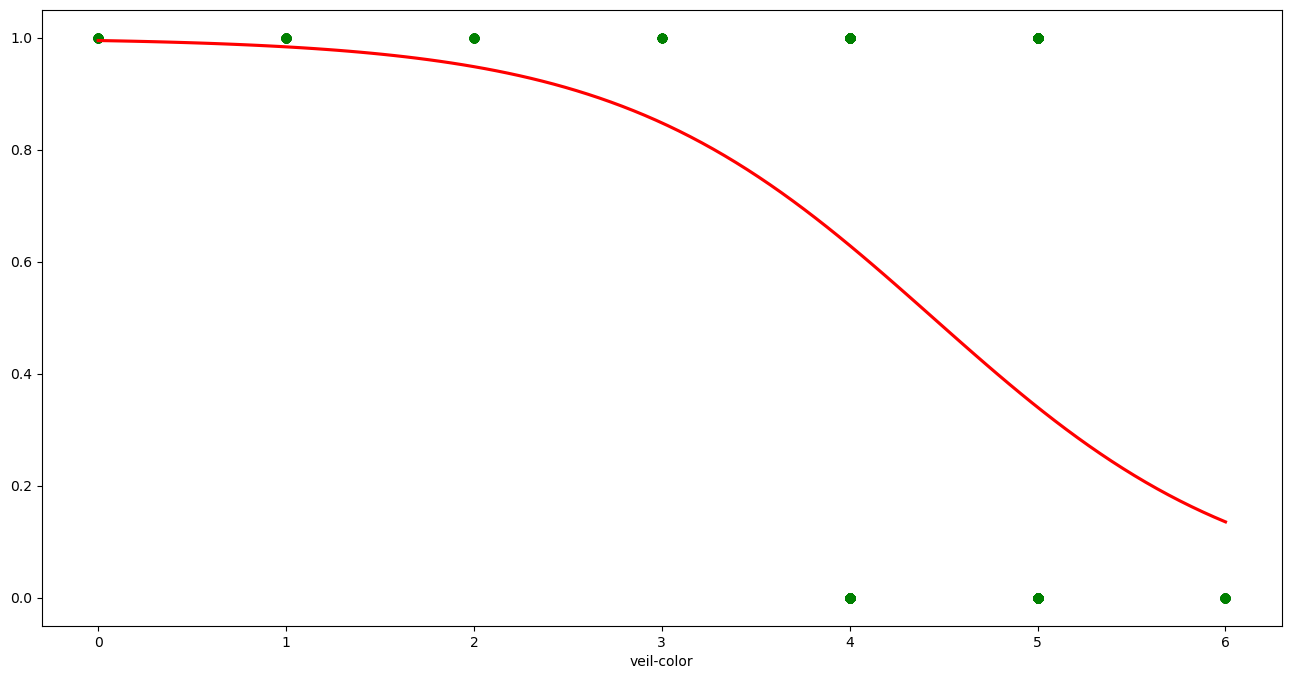

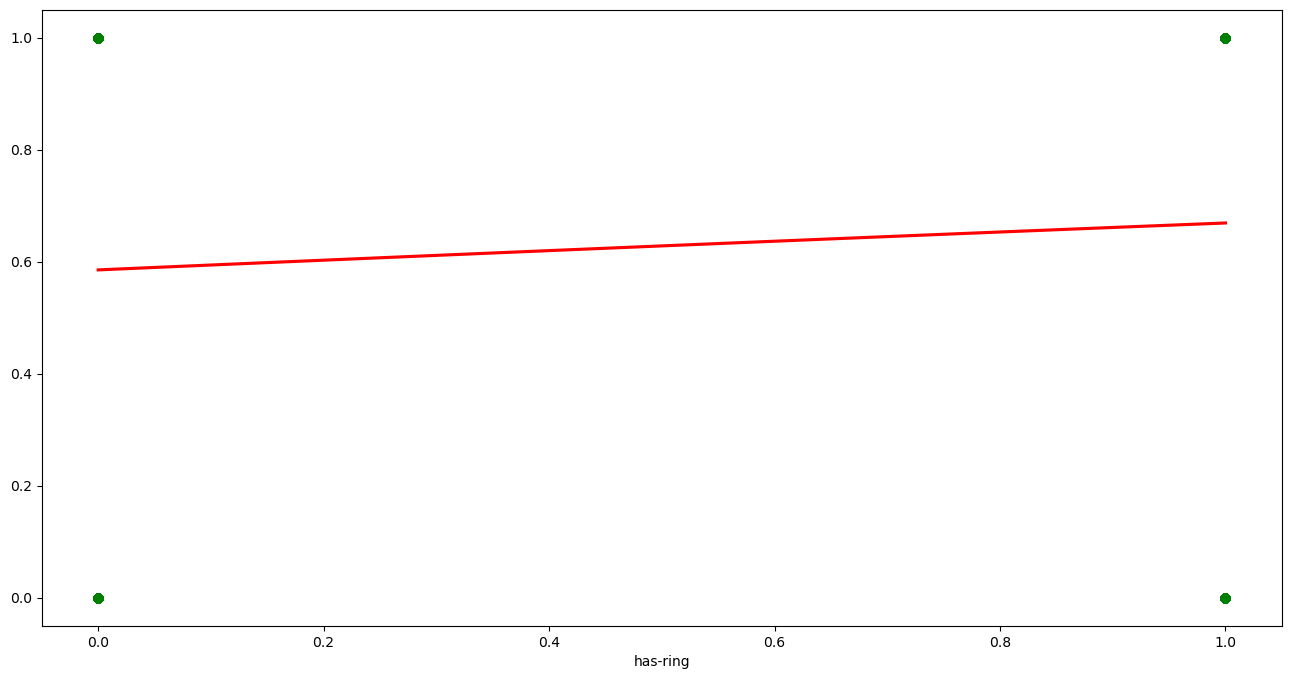

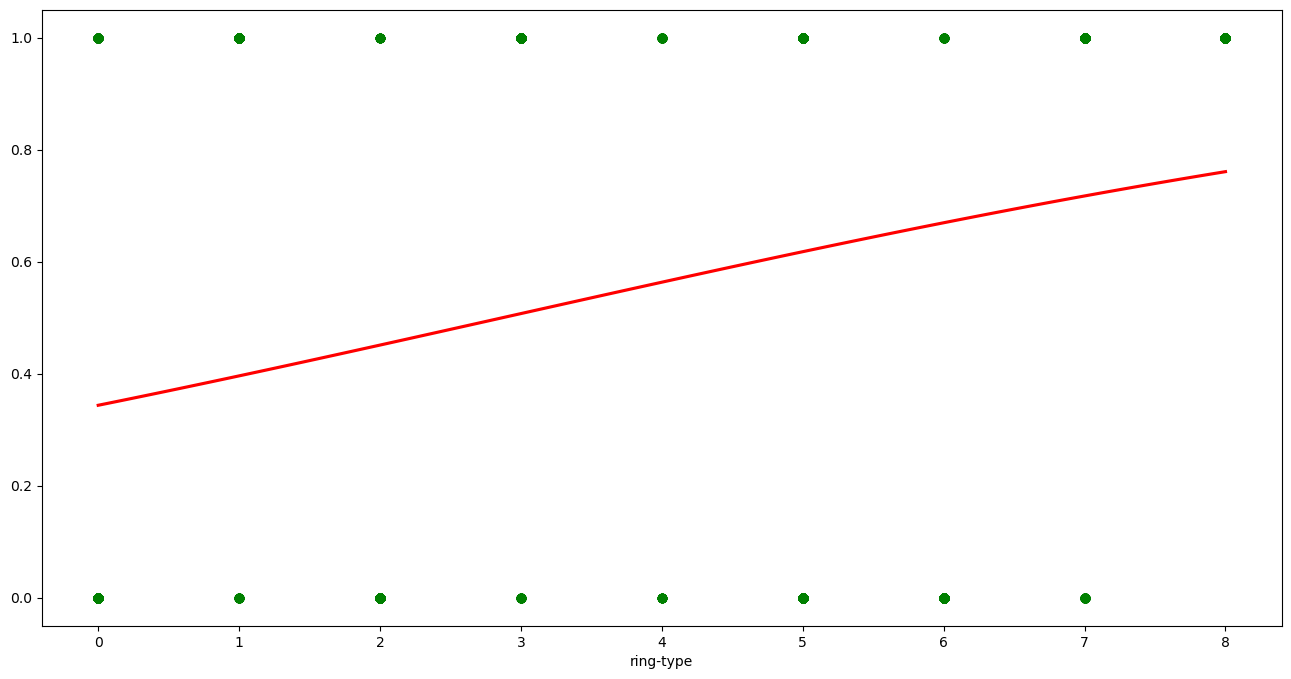

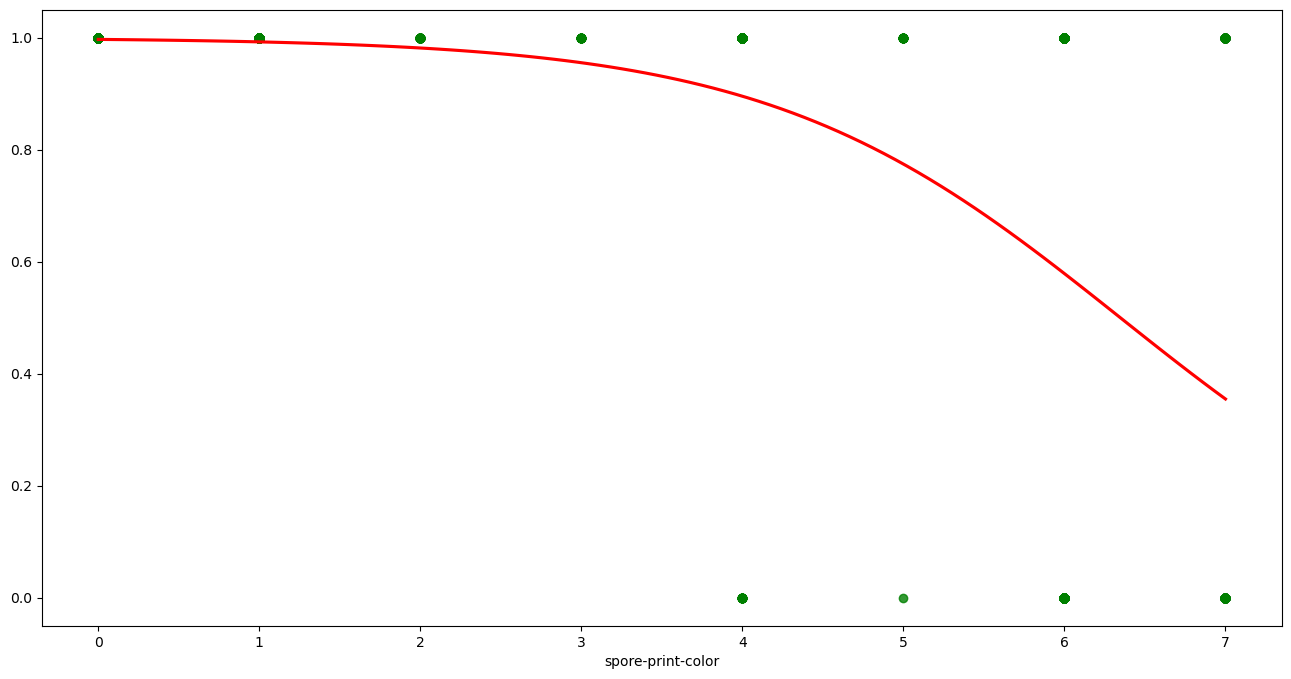

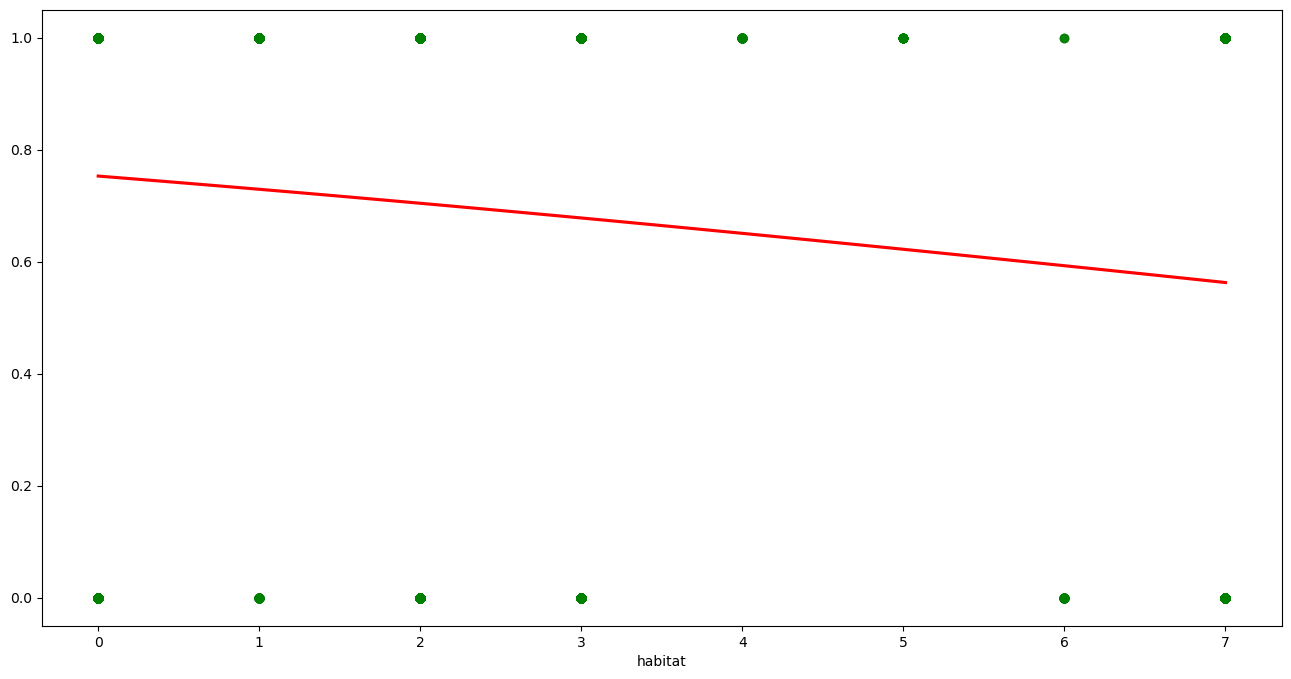

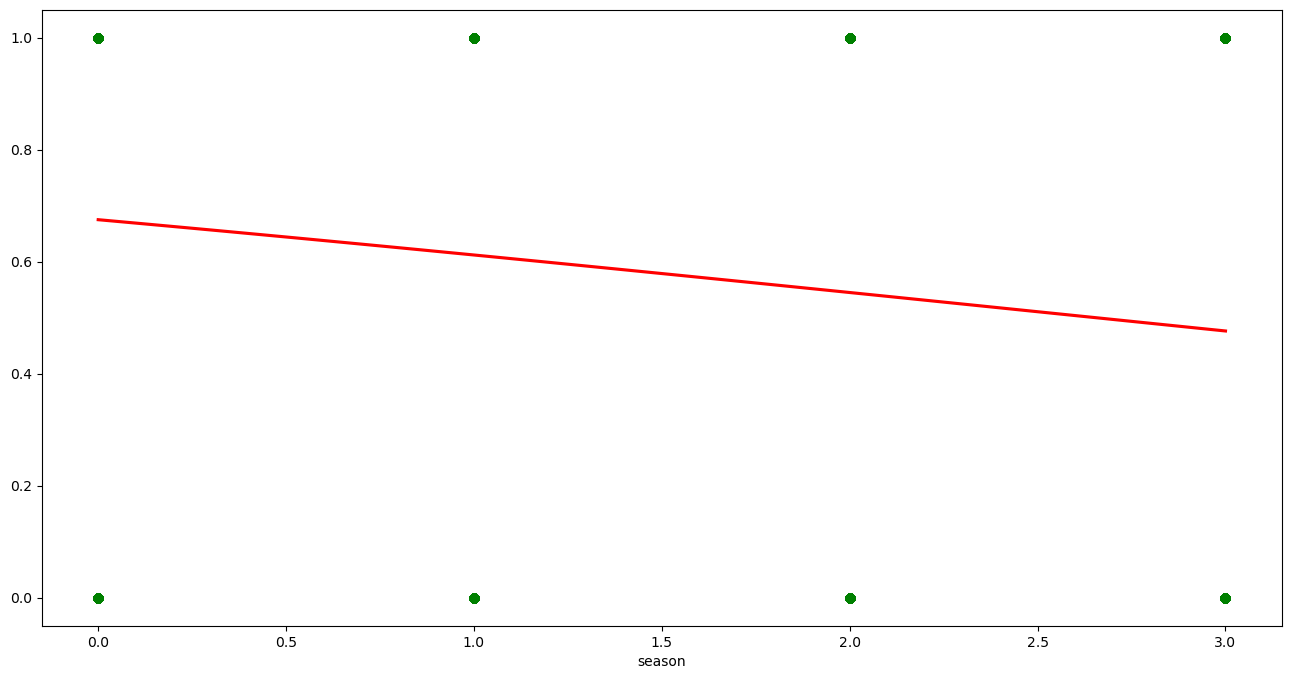

In [28]:
# Plot the logistic regression curve predicted edible test set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_test:
    f = plt.figure(figsize=(16, 8))
    sb.regplot(data = predictor_test, x = column, y = edible_test_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'})

Accuracy : 0.629
              precision    recall  f1-score   support

           0       0.60      0.53      0.56      5476
           1       0.65      0.71      0.68      6738

    accuracy                           0.63     12214
   macro avg       0.62      0.62      0.62     12214
weighted avg       0.63      0.63      0.63     12214



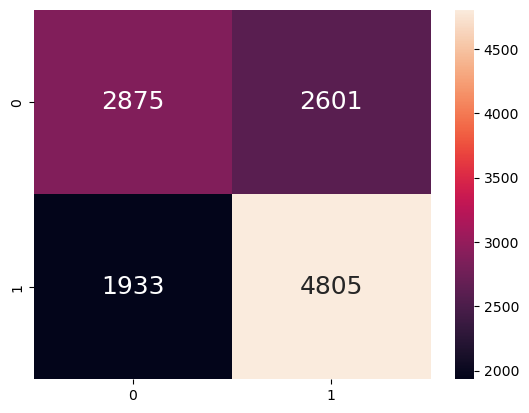

In [29]:
# Print the confusion matrix of the test data set
sb.heatmap(confusion_matrix(edible_test, edible_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", round(accuracy_score(edible_test, edible_test_pred), 3))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

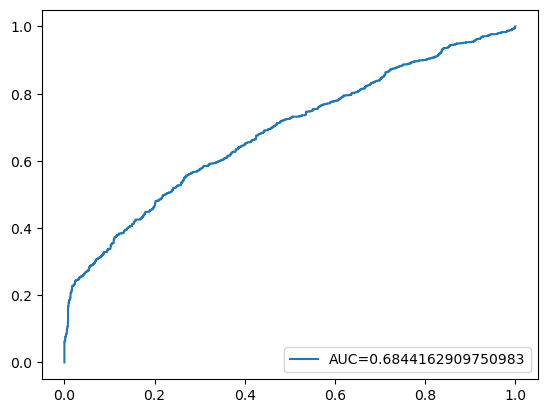

In [30]:
# Define metrics
edible_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
fpr, tpr, _ = roc_curve(edible_test, edible_test_pred_proba)
auc = roc_auc_score(edible_test, edible_test_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

The accuracy score of the train data set tells us that the logistic regression model made the correct predictions on whether the mushroom is edible or not 63.3% of the time.

The accuracy score of the test data set tells us that the logistic regression model made the correct predictions on whether the mushroom is edible or not 63.6% of the time.

The classification report shows us an overview of the various metrics which we can use to assess our model.

We will plot the Receiver Operating Characteristic (ROC) curve for both the train and test sets to display the percentage of the true positives predicted by the model. The higher the area under the curve (AUC), the more accurately our model is able to predict the edibility of the mushroom.

# Model 2 : KNN Classification

Response Variable : class

Predictor Variable : all the categorical variables

//need to explain how it works

In [31]:
# Import the required packages
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Use the same dataset in Model 1 - the dataset with the encoded data
catMushroom = data_encoded.copy()

In [33]:
# Extract the variables and the associated data as a dataframe
predictor = catMushroom.drop(['class'], axis = 1) # these are our predictor variables
edible = pd.DataFrame(catMushroom['class']) # this is our response variable

In [34]:
# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

Train Set : (48855, 1) (48855, 16)
Test Set  : (12214, 1) (12214, 16)


In [35]:
# Visualise the data using Matplotlib

# fig, axes = plt.subplots(1, len(predictor), figsize=(15,5))

# for i, col in predictor:
#     df.plot(kind='scatter', x=col, y='class', ax = ax[i])
#     ax[i].set_xlabel(col)
#     ax[i].set_ylabel('Class')
    
# plt.show()

### Fitting the model

In [43]:
# We will first train the model using a fixed value of 3 for k. This value will be optimised later on
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(predictor_train, edible_train) 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### The train set

In [37]:
# After the model is trained, make predictions of the mushroom edibility class in correspondence with the train dataset
edible_train_pred = knn.predict(predictor_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.9992631255756832
KNN Classification report for Train data (actual vs predicted): 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21723
           1       1.00      1.00      1.00     27132

    accuracy                           1.00     48855
   macro avg       1.00      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855



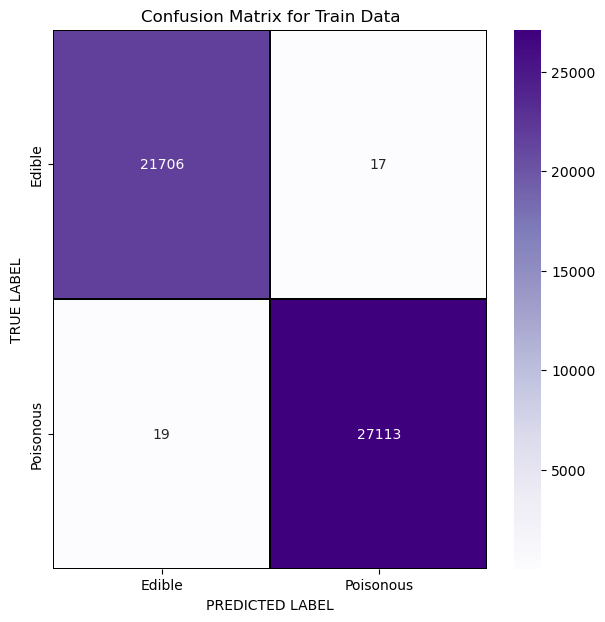

In [38]:
# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_train, edible_train_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("KNN Classification report for Train data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm = confusion_matrix(edible_train, edible_train_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

### The test set

In [39]:
# After the model is trained, make predictions of the mushroom edibility class in correspondence with the test dataset
edible_test_pred = knn.predict(predictor_test)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.9981987882757491
KNN Classification report for Test data (actual vs predicted): 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21723
           1       1.00      1.00      1.00     27132

    accuracy                           1.00     48855
   macro avg       1.00      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855



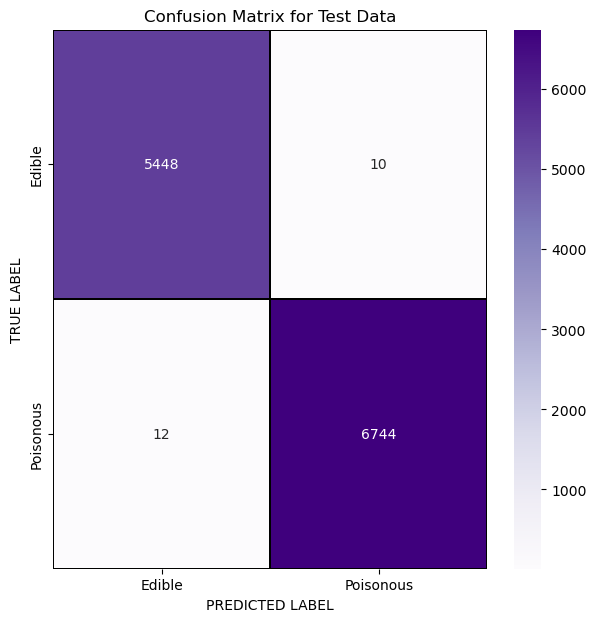

In [40]:
# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_test, edible_test_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("KNN Classification report for Test data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm = confusion_matrix(edible_test, edible_test_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

### Findings

Based on the evaluations done on the Train and Test Datasets, it was found that the Train data had an accuracy of 0.9959471906662573 while the Test data had an accuracy of 0.9918945472408711. As the accuracy of both are very close to each other, it can be determined that the KNN CLustering model used to fit the Train data is performing well. It is neither overfitting or underfitting the data.

But to see if we can further optimise the predictions, we will try using the method of cross validation to optimise the model.

### Optimising the model

In order to find the best value of k to yield the most accurate predictions for the edibility of a mushroom, we utilise the method of cross validation. In order to do this, we need to import the cross_val_score function from the sklearn.model_selection module.

We will use a range of values for k and determine the best k value.

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

KeyboardInterrupt: 

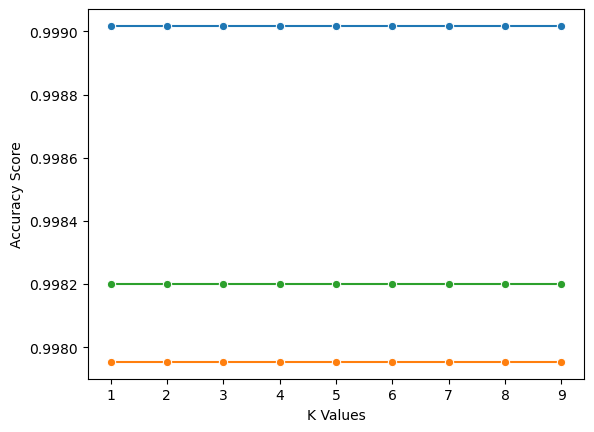

In [54]:
# Optimising the model
best_Kvalue = 0
best_score = 0

# Here we try out different values for n_neighbours and identify which yield s the best results
k_values = list(range(1,10))
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

for i in range(1,10): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(predictor_train, edible_train)
    sb.lineplot(x=k_values, y=knn.score(predictor_test, edible_test), marker='o')
    if knn.score(predictor_test, edible_test) > best_score:
        best_score = knn.score(predictor_train, edible_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))
plt.show()

In [46]:
# The results of our optimisation attempts for the different values of k may be plotted as shown below

# We import the cross_val_score function from the sklearn.odel_selection module
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, predictor, edible) # We use the original feature variables predictor and edible for the x and y data respectively
    scores.append(np.mean(score))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

KeyboardInterrupt: 

In [ ]:
sb.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## MODEL 3 : DECISION TREE



### Training Decision Tree

Train Set : (48855, 1) (48855, 19)
Test Set  : (12214, 1) (12214, 19)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.695404769215024



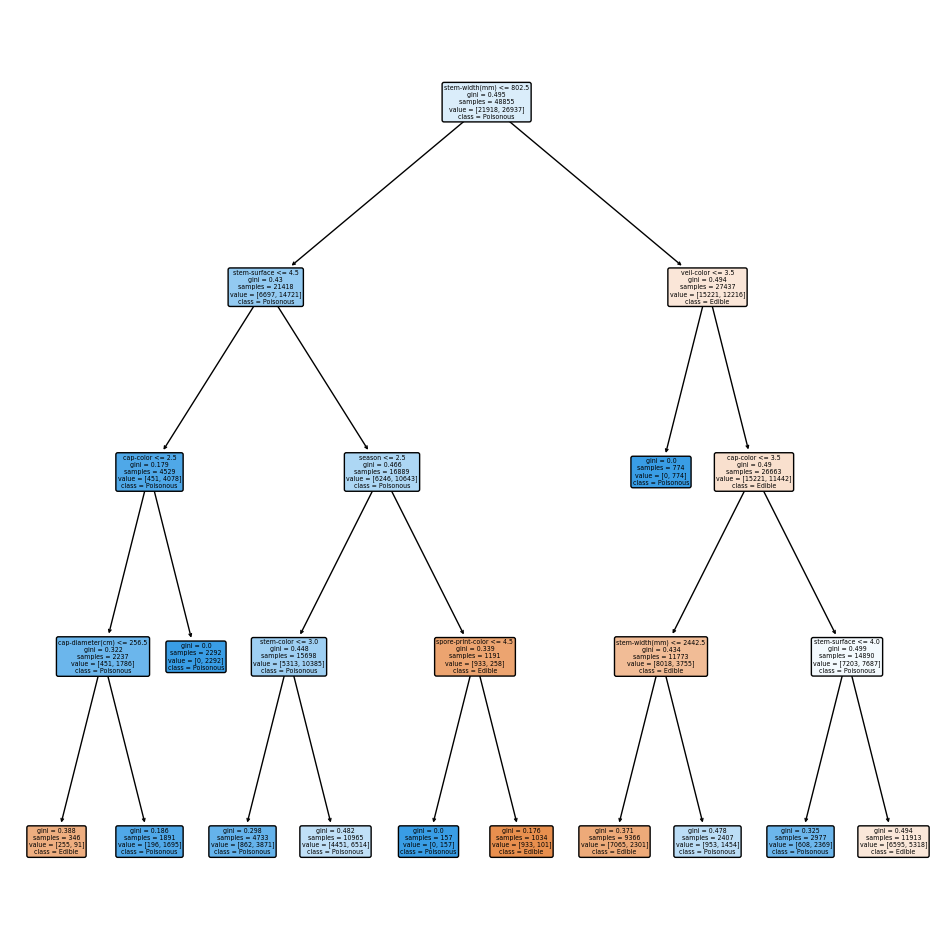

In [67]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Assign Response and Predictors
predictor = mushroom_predictors 
edible = pd.DataFrame(mushroom_clean['class'])

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)
y = pd.DataFrame(mushroom_clean['class'].astype('category'))
X = pd.DataFrame(mushroom_predictors) 

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(predictor_train, edible_train)        # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=predictor.columns, 
          class_names=["Edible","Poisonous"])

# Predict Response corresponding to Predictors
edible_train_pred = dectree.predict(predictor_train)
edible_test_pred = dectree.predict(predictor_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_train, edible_train))
print()



### Inputting Test Set

In [68]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_test, edible_test))
print()


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6908465695103979



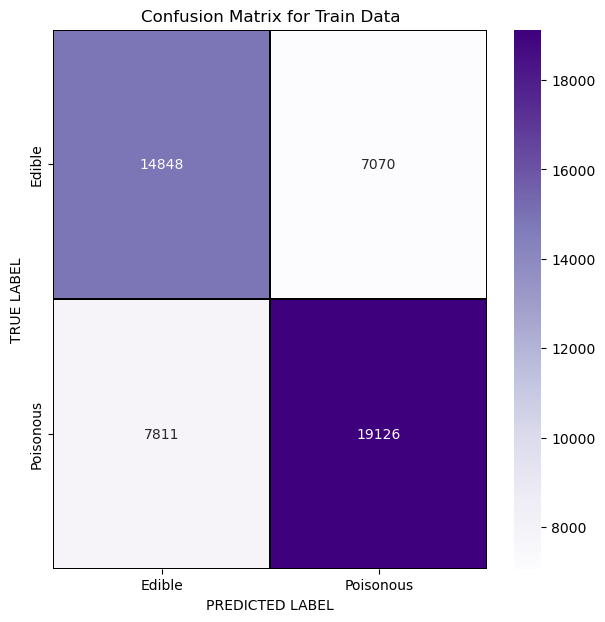

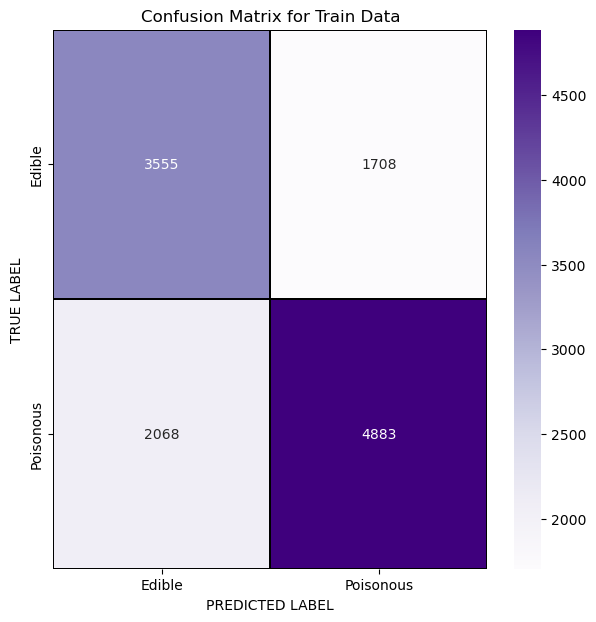

In [69]:
# Plot the Confusion Matrix for Train and Test

cm = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

cm = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()